<a href="https://colab.research.google.com/github/nicha1997/Disseration-Project/blob/main/Final_Coding_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1: Foundational Data Preparation**

## **Step 1.1: Final Data Cleaning & Preprocessing**

In [ ]:
import pandas as pd

# load Excel file
df = pd.read_excel('New Raw Data.xlsx')

# Convert blanks and whitespaces to NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Check missing values again
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent
})

print("Missing values summary for all columns:")
print(missing_summary)


Missing values summary for all columns:
                              Missing Count  Missing Percent (%)
Company_Ticker                            0             0.000000
Company_Name                              0             0.000000
Country                                   0             0.000000
Revenue_2017                           1290            46.654611
Revenue_2018                           1218            44.050633
...                                     ...                  ...
Cash_Flow_to_Debt_Ratio_2020           1253            45.316456
Cash_Flow_to_Debt_Ratio_2021           1222            44.195298
Cash_Flow_to_Debt_Ratio_2022           1209            43.725136
Cash_Flow_to_Debt_Ratio_2023           1205            43.580470
Cash_Flow_to_Debt_Ratio_2024           1274            46.075949

[188 rows x 2 columns]


In [ ]:
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Company_Ticker                   object
Company_Name                     object
Country                          object
Revenue_2017                     object
Revenue_2018                     object
                                 ...   
Cash_Flow_to_Debt_Ratio_2020    float64
Cash_Flow_to_Debt_Ratio_2021    float64
Cash_Flow_to_Debt_Ratio_2022    float64
Cash_Flow_to_Debt_Ratio_2023    float64
Cash_Flow_to_Debt_Ratio_2024    float64
Length: 188, dtype: object


In [ ]:
print("Detailed info of the DataFrame:")
df.info()


Detailed info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Columns: 188 entries, Company_Ticker to Cash_Flow_to_Debt_Ratio_2024
dtypes: float64(32), object(156)
memory usage: 4.0+ MB


In [ ]:
# Define years and Financial indicator names
years = [str(y) for y in range(2017, 2025)]
indicators = ['Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days',
              'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur',
              'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio']

# To collect complete company-year data (with indicator values)
complete_data_records = []

# Loop over each year
for year in years:
    # Build list of column names for this year
    cols_this_year = [f"{indicator}_{year}" for indicator in indicators]

    # Drop rows with any missing in these columns
    complete_rows = df.dropna(subset=cols_this_year).copy()

    # Add 'Year' column
    complete_rows['Year'] = int(year)

    # Keep only identifying columns + the indicator columns for this year
    selected_cols = ['Company_Ticker', 'Company_Name', 'Year'] + cols_this_year
    complete_data_records.append(complete_rows[selected_cols])

# Combine all complete records
final_complete_df = pd.concat(complete_data_records, ignore_index=True)

# Save to Excel
final_complete_df.to_excel("Financial_Complete_Data.xlsx", index=False)

# Download in Colab
from google.colab import files
files.download("Financial_Complete_Data.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define years and ESG indicator names
years = [str(y) for y in range(2017, 2025)]
esg_indicators = [
    'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc'
]

# To collect complete (Company, Year) ESG records
complete_esg_data = []

# Loop over each year
for year in years:
    # Generate column names for this year
    cols_this_year = [f"{indicator}_{year}" for indicator in esg_indicators]

    # Drop rows with any missing ESG data for this year
    complete_rows = df.dropna(subset=cols_this_year).copy()

    # Add Year column
    complete_rows["Year"] = int(year)

    # Keep only identifier + that year's ESG columns
    selected_cols = ['Company_Ticker', 'Company_Name', 'Year'] + cols_this_year
    complete_esg_data.append(complete_rows[selected_cols])

# Combine all complete ESG rows
final_esg_df = pd.concat(complete_esg_data, ignore_index=True)

# Export to Excel
final_esg_df.to_excel("ESG_Complete_Data.xlsx", index=False)

# Download file in Colab
from google.colab import files
files.download("ESG_Complete_Data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np

# Load data
financial_df = pd.read_excel("Financial_Complete_Data.xlsx")
raw_df = pd.read_excel('New Raw Data.xlsx')

# Clean blanks
raw_df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Define years and indicators
years = [str(y) for y in range(2017, 2025)]
financial_indicators = ['Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days',
                        'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur',
                        'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio']
esg_indicators = ['ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc']

# Reshape financial data from wide to long
financial_long = pd.wide_to_long(financial_df,
                                  stubnames=financial_indicators,
                                  i=['Company_Ticker', 'Company_Name', 'Year'],
                                  j='temp_year',
                                  sep='_',
                                  suffix='\\d+').reset_index()

# Drop rows where year mismatch occurred
financial_long = financial_long[financial_long['Year'] == financial_long['temp_year']]
financial_long.drop(columns='temp_year', inplace=True)

# Reshape ESG data
esg_records = []
for year in years:
    cols = [f"{col}_{year}" for col in esg_indicators]
    df_subset = raw_df[['Company_Ticker', 'Company_Name'] + cols].copy()
    df_subset['Year'] = int(year)
    df_subset.rename(columns={f"{col}_{year}": col for col in esg_indicators}, inplace=True)
    esg_records.append(df_subset)

esg_flat = pd.concat(esg_records, ignore_index=True)

# Option 1: Keep only complete Financial & ESG rows
complete_esg = esg_flat.dropna(subset=esg_indicators)
merged_option1 = pd.merge(financial_long, complete_esg, on=['Company_Ticker', 'Company_Name', 'Year'], how='inner')

# Option 2: Keep complete financial, join ESG and add flag columns
merged_option2 = pd.merge(financial_long, esg_flat, on=['Company_Ticker', 'Company_Name', 'Year'], how='left')

# Add binary flags for ESG presence
for col in esg_indicators:
    merged_option2[f"{col}_Flag"] = np.where(merged_option2[col].notna(), 1, 0)

# Export both files
option1_path = "File1_Final_Financial_With_ESG.xlsx"
option2_path = "File2_Final_Financial_With_ESG_Flags.xlsx"
merged_option1.to_excel(option1_path, index=False)
merged_option2.to_excel(option2_path, index=False)

print("Option 1: Financial + ESG")
display(merged_option1)

print("Option 2: Financial + ESG Flags")
display(merged_option2)


Option 1: Financial + ESG


,Company_Ticker,Company_Name,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,...,EBIT,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc
0,2915 TT Equity,RUENTEX INDUSTRIES LTD,2017,3.104367e+10,86.2847,19.5269,1.9317,1.2755,286.1670,113.7925,...,2.501689e+10,288515008.0,86.709151,1.418869e+09,2.688319e+10,0.052779,32.6024,23.2256,12.0617,62.4022
1,LFVN US Equity,LIFEVANTAGE CORP,2017,1.994890e+08,83.2291,3.3464,1.5220,1.6050,227.4213,138.2460,...,4.449000e+06,570000.0,7.805263,6.597000e+06,7.500000e+06,0.879600,31.4958,0,10.006,84.2866
2,4927 JP Equity,POLA ORBIS HOLDINGS INC,2017,2.443350e+11,82.9611,11.2739,3.9747,2.2525,162.0415,8.8378,...,3.888100e+10,69000000.0,563.492775,3.533300e+10,3.744000e+09,9.437233,59.0987,58.653,53.9601,64.6598
3,HLF US Equity,HERBALIFE LTD,2017,4.427700e+09,80.8343,7.8344,2.0515,2.3820,153.2303,54.1284,...,6.171000e+08,160800000.0,3.837687,5.908000e+08,2.268100e+09,0.260482,44.5126,20.1148,28.295,84.9789
4,EL US Equity,ESTEE LAUDER COMPANIES-CL A,2017,1.182400e+10,79.3894,12.0148,1.7584,1.7769,205.4155,8.9137,...,1.692000e+09,103000000.0,16.427184,1.800000e+09,3.572000e+09,0.503919,54.1797,50.8004,26.6324,84.9789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,9267 JP Equity,GENKY DRUGSTORES CO LTD,2024,1.848600e+11,20.3511,5.7530,0.9140,6.3304,57.8162,42.9408,...,9.015000e+09,103000000.0,87.524272,1.325600e+10,3.064800e+10,0.432524,30.9627,0,13.9964,78.7176
3795,1375 JP Equity,YUKIGUNI FACTORY CO LTD,2024,4.747600e+10,24.4671,3.8088,1.1441,8.4396,43.3668,18.9336,...,2.811000e+09,534000000.0,5.264045,5.322000e+09,1.861200e+10,0.285945,55.0951,47.9915,33.5852,83.5942
3796,4936 JP Equity,AXXZIA INC,2024,1.219238e+10,78.8243,7.4781,5.1233,1.2878,284.1995,12.8347,...,9.183440e+08,8079000.0,113.670504,8.003570e+08,9.755580e+08,0.820409,27.6632,2.4162,9.8549,70.5599
3797,KITW LN Equity,KITWAVE GROUP PLC,2024,6.636520e+08,22.2737,5.8776,1.0123,12.4059,29.5020,10.8909,...,2.880400e+07,6191000.0,4.652560,2.528200e+07,1.013170e+08,0.249534,37.964,22.8934,7.2249,83.5942


Option 2: Financial + ESG Flags


,Company_Ticker,Company_Name,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,...,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag
0,202 HK Equity,EVERCHINA INTL HOLDINGS CO L,2017,6.795100e+07,95.7249,1.7625,2.4122,415.0000,0.8795,1.1010,...,1.043893e+09,0.266208,<NA>,<NA>,<NA>,<NA>,0,0,0,0
1,233990 KS Equity,JILGYUNGYI CO LTD,2017,2.055577e+10,93.6801,-16.1825,0.7345,2.4436,149.3725,27.3224,...,5.361500e+09,-0.115259,<NA>,<NA>,<NA>,<NA>,0,0,0,0
2,2915 TT Equity,RUENTEX INDUSTRIES LTD,2017,3.104367e+10,86.2847,19.5269,1.9317,1.2755,286.1670,113.7925,...,2.688319e+10,0.052779,32.6024,23.2256,12.0617,62.4022,1,1,1,1
3,LFVN US Equity,LIFEVANTAGE CORP,2017,1.994890e+08,83.2291,3.3464,1.5220,1.6050,227.4213,138.2460,...,7.500000e+06,0.879600,31.4958,0,10.006,84.2866,1,1,1,1
4,4927 JP Equity,POLA ORBIS HOLDINGS INC,2017,2.443350e+11,82.9611,11.2739,3.9747,2.2525,162.0415,8.8378,...,3.744000e+09,9.437233,59.0987,58.653,53.9601,64.6598,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,GTII CN Equity,GREEN THUMB INDUSTRIES INC,2024,1.137141e+09,52.8614,2.9076,2.4483,4.1212,88.8084,23.7384,...,5.307000e+08,0.367784,<NA>,<NA>,<NA>,<NA>,0,0,0,0
8200,ALAVI FP Equity,ADVINI,2024,2.775510e+08,36.0046,0.0646,0.8704,1.4590,250.8631,11.7954,...,1.912000e+08,0.111564,<NA>,<NA>,<NA>,<NA>,0,0,0,0
8201,OLVAS FH Equity,OLVI OYJ-A SHARES,2024,6.569070e+08,40.5584,11.9792,1.3508,5.1912,70.5036,5.7193,...,1.049900e+07,8.203353,<NA>,<NA>,<NA>,<NA>,0,0,0,0
8202,451250 KS Equity,BBIA CO,2024,5.764475e+10,59.4680,1.4746,6.9002,2.6210,139.6409,15.6397,...,1.719373e+09,-0.570331,<NA>,<NA>,<NA>,<NA>,0,0,0,0


In [ ]:
from google.colab import files
files.download("File1_Final_Financial_With_ESG.xlsx")
files.download("File2_Final_Financial_With_ESG_Flags.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
# Load Excel files into pandas DataFrames
df1 = pd.read_excel("File1_Final_Financial_With_ESG.xlsx")
df2 = pd.read_excel("File2_Final_Financial_With_ESG_Flags.xlsx")

# Display a full summary for File 1
print("--- Data Summary for File 1 ---")
df1.info()

print("\n" + "="*40 + "\n") # Separator

# Display a full summary for File 2
print("--- Data Summary for File 2 ---")
df2.info()

--- Data Summary for File 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Ticker           3799 non-null   object 
 1   Company_Name             3799 non-null   object 
 2   Year                     3799 non-null   int64  
 3   Revenue                  3799 non-null   int64  
 4   GM                       3799 non-null   float64
 5   ROA                      3799 non-null   float64
 6   Curr_Ratio               3799 non-null   float64
 7   Inv_Turnover             3799 non-null   float64
 8   Inv_Days                 3799 non-null   float64
 9   A/R_Trnovr               3799 non-null   float64
 10  A/P_Turnover_Days        3799 non-null   float64
 11  Curr_Assets              3799 non-null   int64  
 12  Curr_Liab                3799 non-null   int64  
 13  W/K_Cap                  3799 non-null   float

## **Step 1.2: Define and Justify the Risk Threshold**

In [ ]:
# Define your risk threshold
threshold = 0.15

# Create the 'Risk_Category' column for both DataFrames
# 1 represents 'High Risk', 0 represents 'Low Risk'
df1['Risk_Category'] = (df1['Cash_Flow_to_Debt_Ratio'] < threshold).astype(int)
df2['Risk_Category'] = (df2['Cash_Flow_to_Debt_Ratio'] < threshold).astype(int)

# Check the distribution for File 1
print("--- Risk Distribution for File 1 ---")
print(df1['Risk_Category'].value_counts(normalize=True) * 100)
print("\n") # Separator

# Check the distribution for File 2
print("--- Risk Distribution for File 2 ---")
print(df2['Risk_Category'].value_counts(normalize=True) * 100)

--- Risk Distribution for File 1 ---
Risk_Category
0    73.624638
1    26.375362
Name: proportion, dtype: float64


--- Risk Distribution for File 2 ---
Risk_Category
0    63.274013
1    36.725987
Name: proportion, dtype: float64


In [ ]:
# Display all column names for File 1
print("--- Columns in File 1 ---")
print(df1.columns.tolist())
display(df1.head())

print("\n" + "="*40 + "\n") # Separator

# Display all column names for File 2
print("--- Columns in File 2 ---")
print(df2.columns.tolist())
display(df2.head())

--- Columns in File 1 ---
['Company_Ticker', 'Company_Name', 'Year', 'Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur', 'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio', 'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc', 'Risk_Category']


,Company_Ticker,Company_Name,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,...,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,Risk_Category
0,2915 TT Equity,RUENTEX INDUSTRIES LTD,2017,31043674112,86.2847,19.5269,1.9317,1.2755,286.1670,113.7925,...,288515008.0,86.709151,1418868992,26883188736,0.052779,32.6024,23.2256,12.0617,62.4022,1
1,LFVN US Equity,LIFEVANTAGE CORP,2017,199488992,83.2291,3.3464,1.5220,1.6050,227.4213,138.2460,...,570000.0,7.805263,6597000,7500000,0.879600,31.4958,0.0000,10.0060,84.2866,0
2,4927 JP Equity,POLA ORBIS HOLDINGS INC,2017,244335001600,82.9611,11.2739,3.9747,2.2525,162.0415,8.8378,...,69000000.0,563.492775,35333001216,3744000000,9.437233,59.0987,58.6530,53.9601,64.6598,0
3,HLF US Equity,HERBALIFE LTD,2017,4427700224,80.8343,7.8344,2.0515,2.3820,153.2303,54.1284,...,160800000.0,3.837687,590800000,2268100096,0.260482,44.5126,20.1148,28.2950,84.9789,0
4,EL US Equity,ESTEE LAUDER COMPANIES-CL A,2017,11824000000,79.3894,12.0148,1.7584,1.7769,205.4155,8.9137,...,103000000.0,16.427184,1800000000,3572000000,0.503919,54.1797,50.8004,26.6324,84.9789,0




--- Columns in File 2 ---
['Company_Ticker', 'Company_Name', 'Year', 'Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur', 'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio', 'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc', 'ESG_Disc_Score_Flag', 'Env_Disc_Sc_Flag', 'Soc_Disc_Sc_Flag', 'Gov_Disc_Sc_Flag', 'Risk_Category']


,Company_Ticker,Company_Name,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,...,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag,Risk_Category
0,202 HK Equity,EVERCHINA INTL HOLDINGS CO L,2017,6.795100e+07,95.7249,1.7625,2.4122,415.0000,0.8795,1.1010,...,0.266208,NaN,NaN,NaN,NaN,0,0,0,0,0
1,233990 KS Equity,JILGYUNGYI CO LTD,2017,2.055577e+10,93.6801,-16.1825,0.7345,2.4436,149.3725,27.3224,...,-0.115259,NaN,NaN,NaN,NaN,0,0,0,0,1
2,2915 TT Equity,RUENTEX INDUSTRIES LTD,2017,3.104367e+10,86.2847,19.5269,1.9317,1.2755,286.1670,113.7925,...,0.052779,32.6024,23.2256,12.0617,62.4022,1,1,1,1,1
3,LFVN US Equity,LIFEVANTAGE CORP,2017,1.994890e+08,83.2291,3.3464,1.5220,1.6050,227.4213,138.2460,...,0.879600,31.4958,0.0000,10.0060,84.2866,1,1,1,1,0
4,4927 JP Equity,POLA ORBIS HOLDINGS INC,2017,2.443350e+11,82.9611,11.2739,3.9747,2.2525,162.0415,8.8378,...,9.437233,59.0987,58.6530,53.9601,64.6598,1,1,1,1,0


In [ ]:
import pandas as pd
from google.colab import files

# Assume df1 and df2 are already loaded and have the 'Risk_Category' column

# 1. Check the data types for both files
print("--- Data Summary for File 1 ---")
df1.info()
print("\n" + "="*40 + "\n")
print("--- Data Summary for File 2 ---")
df2.info()
print("\n" + "="*40 + "\n")

# 2. Define new filenames for the updated files
new_filename1 = "File1_with_Risk_Category.xlsx"
new_filename2 = "File2_with_Risk_Category.xlsx"

# 3. Save the DataFrames to new Excel files
# index=False prevents writing the row numbers into the file
print(f"Saving {new_filename1}...")
df1.to_excel(new_filename1, index=False)

print(f"Saving {new_filename2}...")
df2.to_excel(new_filename2, index=False)

# 4. Download the newly created files to your computer
print("\nStarting file downloads...")
files.download(new_filename1)
files.download(new_filename2)

print("Downloads initiated.")

--- Data Summary for File 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Ticker           3799 non-null   object 
 1   Company_Name             3799 non-null   object 
 2   Year                     3799 non-null   int64  
 3   Revenue                  3799 non-null   int64  
 4   GM                       3799 non-null   float64
 5   ROA                      3799 non-null   float64
 6   Curr_Ratio               3799 non-null   float64
 7   Inv_Turnover             3799 non-null   float64
 8   Inv_Days                 3799 non-null   float64
 9   A/R_Trnovr               3799 non-null   float64
 10  A/P_Turnover_Days        3799 non-null   float64
 11  Curr_Assets              3799 non-null   int64  
 12  Curr_Liab                3799 non-null   int64  
 13  W/K_Cap                  3799 non-null   float

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloads initiated.


## **Step 1.3: Exploratory Data Analysis (EDA)**

### **1. Descriptive Statistics**

In [ ]:
import pandas as pd

# Load the two Excel files
df1_final = pd.read_excel("File1_with_Risk_Category.xlsx")
df2_final = pd.read_excel("File2_with_Risk_Category.xlsx")

# Descriptive Statistics for File 1
print("--- Descriptive Statistics for File 1 ---")
# .describe() calculates the key stats for all numerical columns
summary_stats_df1 = df1_final.describe()
display(summary_stats_df1)

# Descriptive Statistics for File 2
print("\n--- Descriptive Statistics for File 2 ---")
summary_stats_df2 = df2_final.describe()
display(summary_stats_df2)

--- Descriptive Statistics for File 1 ---


,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,A/P_Turnover_Days,Curr_Assets,...,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,Risk_Category
count,3799.000000,3.799000e+03,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3.799000e+03,...,3.799000e+03,3.799000e+03,3.799000e+03,3.799000e+03,3799.000000,3799.00000,3799.000000,3799.000000,3799.000000,3799.000000
mean,2020.280863,5.183375e+11,30.661748,3.403807,1.780002,9.809000,90.778294,54.747972,54.591189,2.019526e+11,...,4.717752e+09,8.650665e+02,3.889000e+10,1.646168e+11,10.817038,40.74864,26.934633,22.878013,72.312215,0.263754
std,2.037130,2.204658e+12,17.186686,9.959485,1.316206,12.156586,228.312017,422.060235,108.034452,9.196501e+11,...,3.763177e+10,3.547276e+04,1.997172e+11,9.660064e+11,234.266599,14.84514,23.247950,14.058890,14.712803,0.440725
min,2017.000000,6.311000e+06,-120.882000,-198.059800,0.049200,0.036100,2.510600,0.147800,2.535700,4.232000e+06,...,3.000000e+03,-8.607133e+03,-8.657661e+11,2.600000e+04,-227.812500,5.16040,0.000000,0.000000,4.997000,0.000000
25%,2019.000000,1.971447e+09,18.446600,1.681950,0.989250,3.995400,34.482850,7.089900,28.258250,7.629990e+08,...,1.010000e+07,3.579582e+00,8.467100e+07,4.007410e+08,0.141521,28.25675,1.902700,11.547800,61.017500,0.000000
50%,2020.000000,1.929350e+10,27.841300,3.930500,1.411200,6.504300,56.116600,10.643200,42.508300,7.024958e+09,...,6.590000e+07,1.097826e+01,1.096819e+09,3.662190e+09,0.297348,39.12080,24.252500,19.226100,73.720600,0.000000
75%,2022.000000,1.629560e+11,39.734750,6.607800,2.131150,10.591250,91.424900,20.274950,63.475300,4.518629e+10,...,2.965095e+08,4.246822e+01,8.034764e+09,2.077908e+10,0.630707,52.21810,46.209600,31.423800,84.286600,1.000000
max,2024.000000,3.007951e+13,86.284700,76.401100,14.690000,145.381200,10111.538100,20109.279300,5294.852500,1.547694e+13,...,8.329340e+11,2.165682e+06,3.802324e+12,1.237531e+13,11301.999616,79.99200,89.217800,80.532000,100.000000,1.000000



--- Descriptive Statistics for File 2 ---


,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,A/P_Turnover_Days,Curr_Assets,...,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag,Risk_Category
count,8204.000000,8.204000e+03,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8.204000e+03,...,8204.000000,3799.00000,3799.000000,3799.000000,3799.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000
mean,2020.661994,3.466606e+11,29.695969,-1.342453,1.936820,31.392573,121.097132,139.950667,69.757748,1.359778e+11,...,6.271486,40.74864,26.934633,22.878013,72.312215,0.463067,0.463067,0.463067,0.463067,0.367260
std,2.254926,1.739508e+12,20.309315,57.420974,1.775757,1549.744485,682.787499,5258.998204,289.433393,7.146449e+11,...,168.802386,14.84514,23.247950,14.058890,14.712803,0.498664,0.498664,0.498664,0.498664,0.482088
min,2017.000000,6.455000e+03,-357.858100,-3896.649200,0.009900,0.007100,0.002600,0.054000,0.031200,3.680000e+04,...,-1279.338097,5.16040,0.000000,0.000000,4.997000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,6.196257e+08,17.161725,0.398075,0.978250,3.377050,36.864650,6.463875,27.057825,3.325815e+08,...,0.058572,28.25675,1.902700,11.547800,61.017500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,1.009243e+10,26.912900,3.255250,1.442750,5.836800,62.556650,9.642300,41.539450,3.916886e+09,...,0.244407,39.12080,24.252500,19.226100,73.720600,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.000000,8.629248e+10,39.702550,6.393275,2.247300,9.912075,108.273975,16.591625,64.250600,3.086600e+10,...,0.596593,52.21810,46.209600,31.423800,84.286600,1.000000,1.000000,1.000000,1.000000,1.000000
max,2024.000000,3.007951e+13,97.845900,433.318900,39.820500,138992.156300,51692.296900,360039.281300,11617.344700,1.547694e+13,...,11301.999616,79.99200,89.217800,80.532000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Format the table for File 1
print("--- Table 1: Descriptive Statistics for File 1 (with Quartiles) ---")

# 1. Get the descriptive statistics and transpose it
stats_table1 = df1_final.describe().T

# 2. Select the columns you need, including the quartiles
stats_table1 = stats_table1[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# 3. Rename the columns to match the desired format
stats_table1 = stats_table1.rename(columns={
    'count': 'Obs',
    'mean': 'Mean',
    'std': 'Std.Dev.',
    'min': 'Min',
    '25%': 'Q1 (25%)',
    '50%': 'Median (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Max'
})

# Display the final table, formatted to two decimal places
display(stats_table1.style.format("{:.2f}"))

# Format the table for File 2
print("\n--- Table 2: Descriptive Statistics for File 2 (with Quartiles) ---")
stats_table2 = df2_final.describe().T
stats_table2 = stats_table2[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
stats_table2 = stats_table2.rename(columns={
    'count': 'Obs',
    'mean': 'Mean',
    'std': 'Std.Dev.',
    'min': 'Min',
    '25%': 'Q1 (25%)',
    '50%': 'Median (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Max'
})
display(stats_table2.style.format("{:.2f}"))

--- Table 1: Descriptive Statistics for File 1 (with Quartiles) ---


,Obs,Mean,Std.Dev.,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,3799.00,2020.28,2.04,2017.00,2019.00,2020.00,2022.00,2024.00
Revenue,3799.00,518337503431.56,2204658029866.40,6311000.00,1971446976.00,19293497344.00,162955993088.00,30079514050560.00
GM,3799.00,30.66,17.19,-120.88,18.45,27.84,39.73,86.28
ROA,3799.00,3.40,9.96,-198.06,1.68,3.93,6.61,76.40
Curr_Ratio,3799.00,1.78,1.32,0.05,0.99,1.41,2.13,14.69
Inv_Turnover,3799.00,9.81,12.16,0.04,4.00,6.50,10.59,145.38
Inv_Days,3799.00,90.78,228.31,2.51,34.48,56.12,91.42,10111.54
A/R_Trnovr,3799.00,54.75,422.06,0.15,7.09,10.64,20.27,20109.28
A/P_Turnover_Days,3799.00,54.59,108.03,2.54,28.26,42.51,63.48,5294.85
Curr_Assets,3799.00,201952596694.00,919650058109.00,4232000.00,762999008.00,7024957952.00,45186291712.00,15476938768384.00



--- Table 2: Descriptive Statistics for File 2 (with Quartiles) ---


,Obs,Mean,Std.Dev.,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,8204.00,2020.66,2.25,2017.00,2019.00,2021.00,2023.00,2024.00
Revenue,8204.00,346660566723.89,1739507787367.02,6455.00,619625744.00,10092430848.00,86292482048.00,30079514050560.00
GM,8204.00,29.70,20.31,-357.86,17.16,26.91,39.70,97.85
ROA,8204.00,-1.34,57.42,-3896.65,0.40,3.26,6.39,433.32
Curr_Ratio,8204.00,1.94,1.78,0.01,0.98,1.44,2.25,39.82
Inv_Turnover,8204.00,31.39,1549.74,0.01,3.38,5.84,9.91,138992.16
Inv_Days,8204.00,121.10,682.79,0.00,36.86,62.56,108.27,51692.30
A/R_Trnovr,8204.00,139.95,5259.00,0.05,6.46,9.64,16.59,360039.28
A/P_Turnover_Days,8204.00,69.76,289.43,0.03,27.06,41.54,64.25,11617.34
Curr_Assets,8204.00,135977830503.77,714644921449.83,36800.00,332581496.00,3916885504.00,30866000384.00,15476938768384.00


In [ ]:
import pandas as pd

# 1. Define the number format for all numeric columns
formatter = {
    'Obs': '{:.0f}', 'Mean': '{:.2f}', 'Std.Dev.': '{:.2f}', 'Skewness': '{:.2f}', 'Kurtosis': '{:.2f}',
    'Min': '{:.2f}', 'Q1 (25%)': '{:.2f}', 'Median (50%)': '{:.2f}', 'Q3 (75%)': '{:.2f}', 'Max': '{:.2f}'
}


# Process and Display Table for File 1
print("--- Table 1: Descriptive Statistics for File 1 ---")
# Get the descriptive statistics and transpose it
stats_table1 = df1_final.describe().T
# Calculate and add Skewness and Kurtosis
stats_table1['Skewness'] = df1_final.skew(numeric_only=True)
stats_table1['Kurtosis'] = df1_final.kurt(numeric_only=True)
# Reorder the columns for a logical flow
stats_table1 = stats_table1[['count', 'mean', 'std', 'Skewness', 'Kurtosis', 'min', '25%', '50%', '75%', 'max']]
# Rename the columns for the final display
stats_table1 = stats_table1.rename(columns={
    'count': 'Obs', 'mean': 'Mean', 'std': 'Std.Dev.', 'min': 'Min', '25%': 'Q1 (25%)',
    '50%': 'Median (50%)', '75%': 'Q3 (75%)', 'max': 'Max'
})
# Display the final, formatted table
display(stats_table1.style.format(formatter))


# Process and Display Table for File 2
print("\n--- Table 2: Descriptive Statistics for File 2 ---")
# Get the descriptive statistics and transpose it
stats_table2 = df2_final.describe().T
# Calculate and add Skewness and Kurtosis
stats_table2['Skewness'] = df2_final.skew(numeric_only=True)
stats_table2['Kurtosis'] = df2_final.kurt(numeric_only=True)
# Reorder the columns for a logical flow
stats_table2 = stats_table2[['count', 'mean', 'std', 'Skewness', 'Kurtosis', 'min', '25%', '50%', '75%', 'max']]
# Rename the columns for the final display
stats_table2 = stats_table2.rename(columns={
    'count': 'Obs', 'mean': 'Mean', 'std': 'Std.Dev.', 'min': 'Min', '25%': 'Q1 (25%)',
    '50%': 'Median (50%)', '75%': 'Q3 (75%)', 'max': 'Max'
})
# Display the final, formatted table
display(stats_table2.style.format(formatter))

--- Table 1: Descriptive Statistics for File 1 ---


,Obs,Mean,Std.Dev.,Skewness,Kurtosis,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,3799,2020.28,2.04,-0.06,-1.11,2017.00,2019.00,2020.00,2022.00,2024.00
Revenue,3799,518337503431.56,2204658029866.40,7.89,73.98,6311000.00,1971446976.00,19293497344.00,162955993088.00,30079514050560.00
GM,3799,30.66,17.19,0.48,2.00,-120.88,18.45,27.84,39.73,86.28
ROA,3799,3.40,9.96,-6.55,88.76,-198.06,1.68,3.93,6.61,76.40
Curr_Ratio,3799,1.78,1.32,3.10,16.01,0.05,0.99,1.41,2.13,14.69
Inv_Turnover,3799,9.81,12.16,5.10,38.83,0.04,4.00,6.50,10.59,145.38
Inv_Days,3799,90.78,228.31,26.94,1049.45,2.51,34.48,56.12,91.42,10111.54
A/R_Trnovr,3799,54.75,422.06,33.84,1446.41,0.15,7.09,10.64,20.27,20109.28
A/P_Turnover_Days,3799,54.59,108.03,36.37,1622.84,2.54,28.26,42.51,63.48,5294.85
Curr_Assets,3799,201952596694.00,919650058109.00,8.06,78.75,4232000.00,762999008.00,7024957952.00,45186291712.00,15476938768384.00



--- Table 2: Descriptive Statistics for File 2 ---


,Obs,Mean,Std.Dev.,Skewness,Kurtosis,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,8204,2020.66,2.25,-0.09,-1.19,2017.00,2019.00,2021.00,2023.00,2024.00
Revenue,8204,346660566723.89,1739507787367.02,10.26,128.75,6455.00,619625744.00,10092430848.00,86292482048.00,30079514050560.00
GM,8204,29.70,20.31,-2.33,42.79,-357.86,17.16,26.91,39.70,97.85
ROA,8204,-1.34,57.42,-43.54,2686.59,-3896.65,0.40,3.26,6.39,433.32
Curr_Ratio,8204,1.94,1.78,4.68,48.25,0.01,0.98,1.44,2.25,39.82
Inv_Turnover,8204,31.39,1549.74,88.07,7884.65,0.01,3.38,5.84,9.91,138992.16
Inv_Days,8204,121.10,682.79,57.42,4084.79,0.00,36.86,62.56,108.27,51692.30
A/R_Trnovr,8204,139.95,5259.00,58.62,3615.30,0.05,6.46,9.64,16.59,360039.28
A/P_Turnover_Days,8204,69.76,289.43,25.70,812.56,0.03,27.06,41.54,64.25,11617.34
Curr_Assets,8204,135977830503.77,714644921449.83,10.32,132.23,36800.00,332581496.00,3916885504.00,30866000384.00,15476938768384.00


### **2. Correlation Matrix**

--- Correlation Heatmap for Independent Variables (File 1) ---


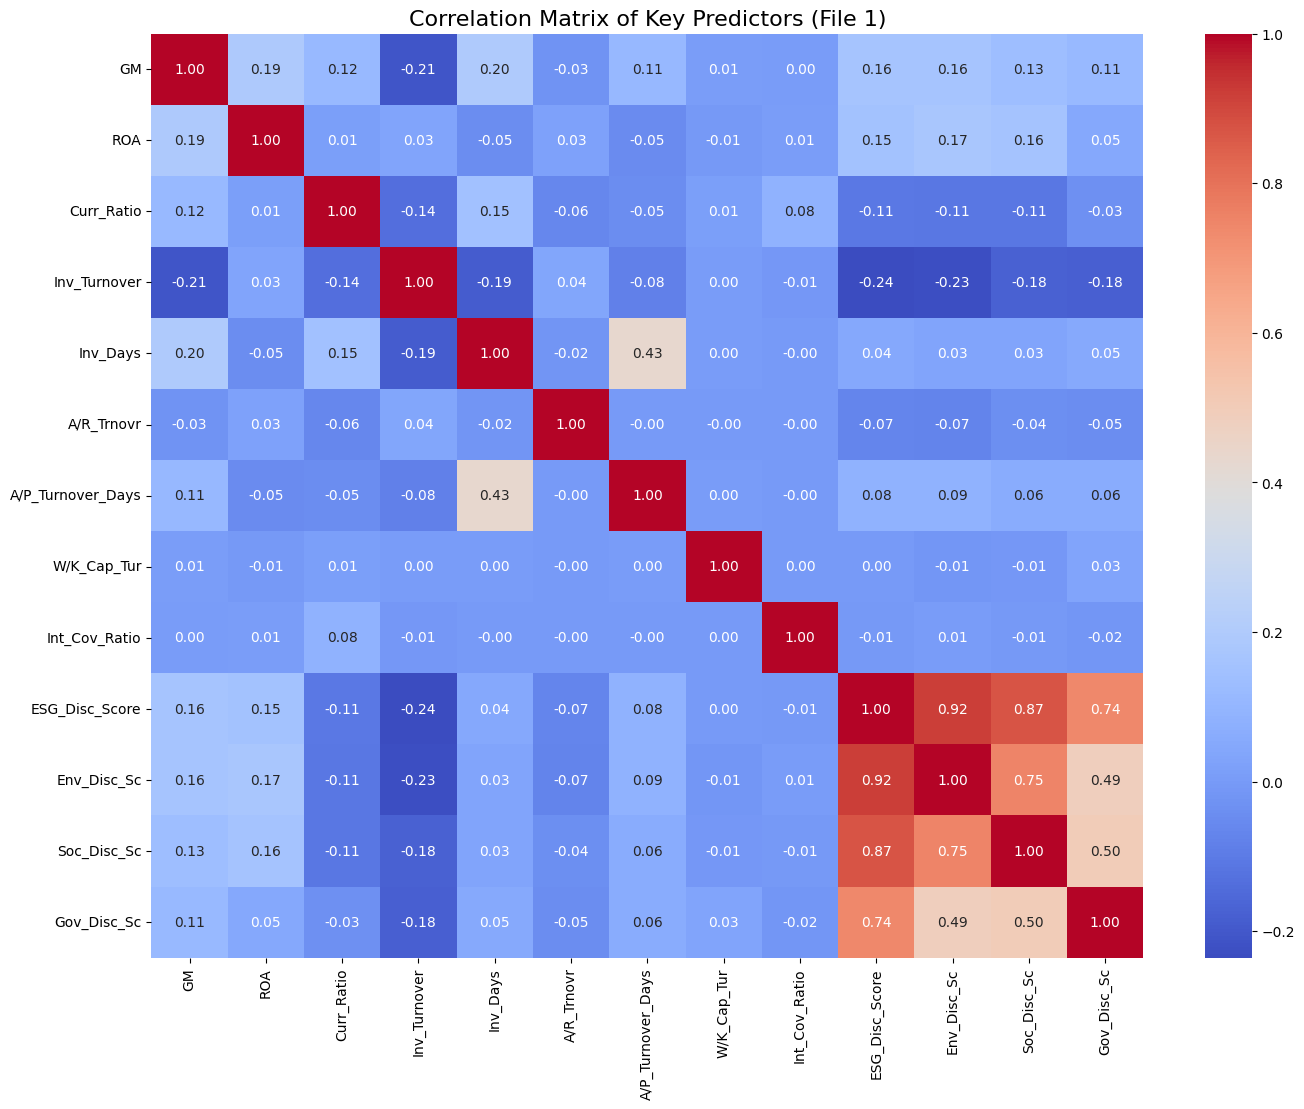


--- Correlation Heatmap for Independent Variables (File 2) ---


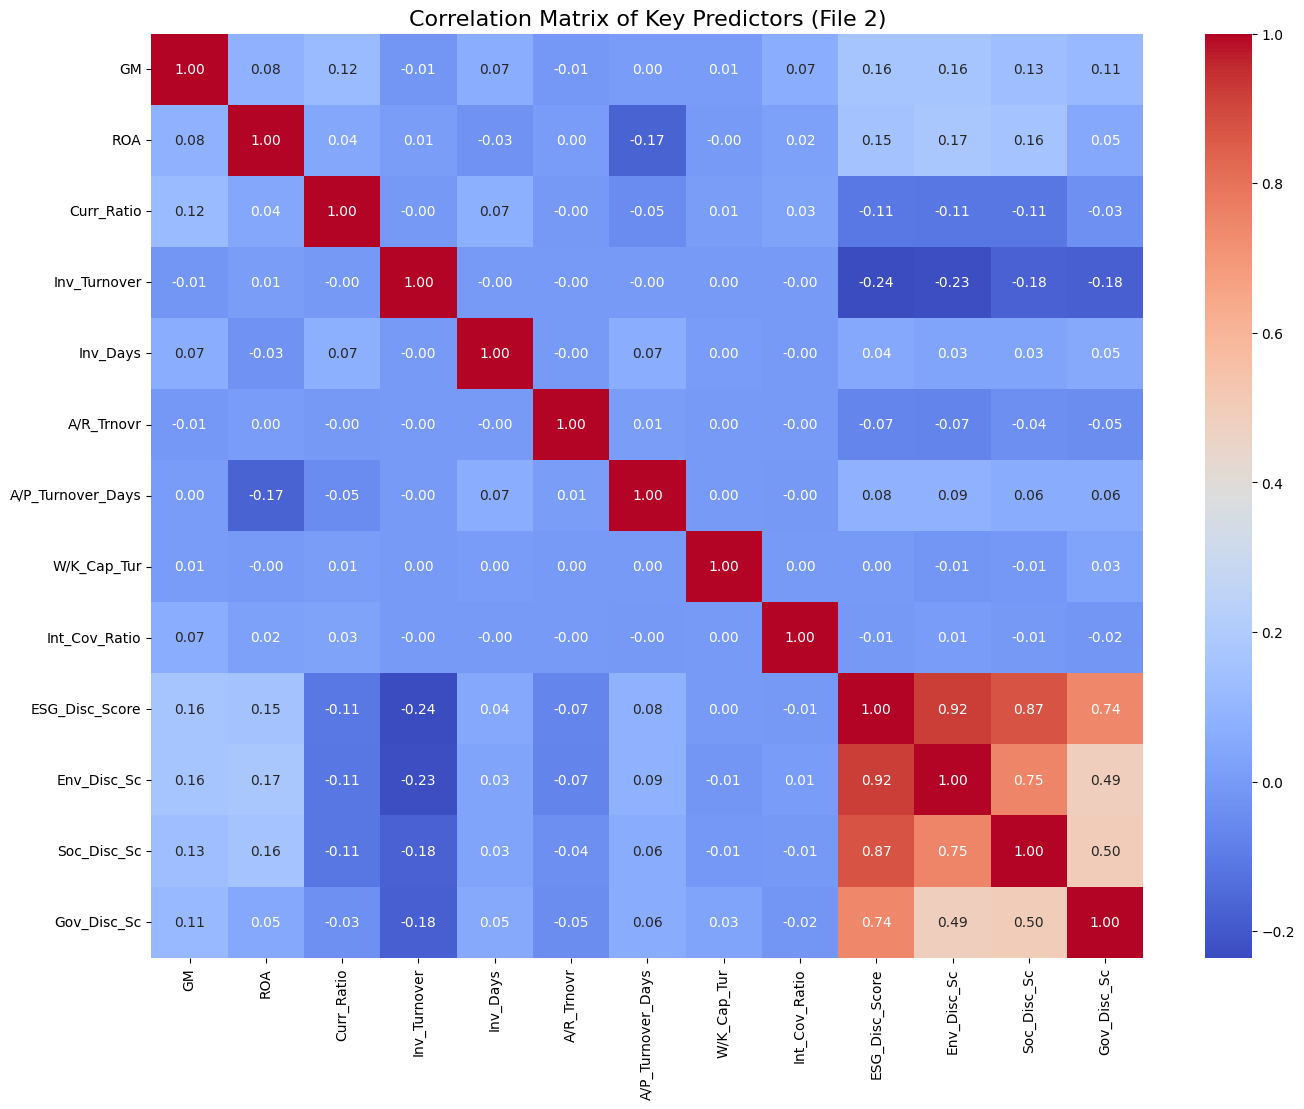

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume df1_final and df2_final are your loaded DataFrames ---

# 1. Define the list of columns you want to drop from the analysis
cols_to_drop = [
    'Revenue', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap',
    'Avg_W/K_Cap', 'EBIT', 'Int_Exp', 'CFO', 'Tot_Debt'
]

# --- Heatmap for File 1 ---
print("--- Correlation Heatmap for Independent Variables (File 1) ---")

# 2. Create a new DataFrame for predictors by dropping specified columns
# We also drop identifiers and target variables as before
predictors1 = df1_final.drop(columns=['Company_Ticker', 'Company_Name', 'Year',
                                      'Cash_Flow_to_Debt_Ratio', 'Risk_Category'] + cols_to_drop,
                             errors='ignore') # 'errors=ignore' prevents errors if a column doesn't exist

# 3. Calculate the correlation matrix
corr_matrix1 = predictors1.corr()

# 4. Create the heatmap
plt.figure(figsize=(16, 12)) # Adjusted size for fewer variables
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt=".2f") # annot=True is now readable
plt.title('Correlation Matrix of Key Predictors (File 1)', fontsize=16)
plt.show()


# --- Heatmap for File 2 ---
print("\n--- Correlation Heatmap for Independent Variables (File 2) ---")

# Create the predictor DataFrame for File 2
predictors2 = df2_final.drop(columns=['Company_Ticker', 'Company_Name', 'Year',
                                      'Cash_Flow_to_Debt_Ratio', 'Risk_Category',
                                      'ESG_Disc_Score_Flag', 'Env_Disc_Sc_Flag',
                                      'Soc_Disc_Sc_Flag', 'Gov_Disc_Sc_Flag'] + cols_to_drop,
                             errors='ignore')
corr_matrix2 = predictors2.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Key Predictors (File 2)', fontsize=16)
plt.show()

### **3. Visualisations**

--- Visualizations for File 1 (Fully Complete Data) ---


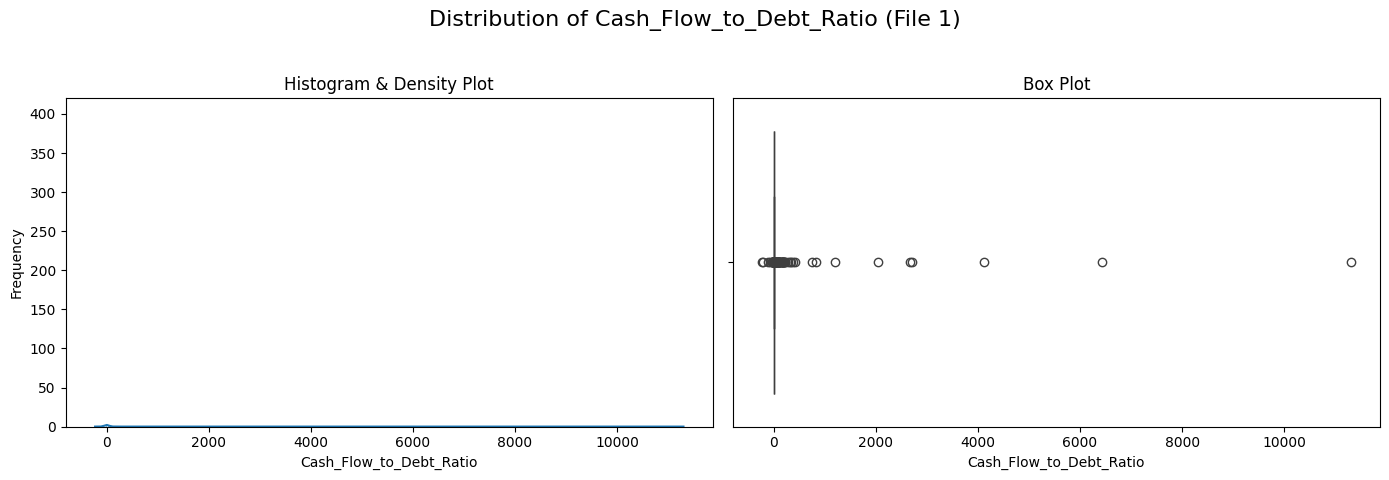

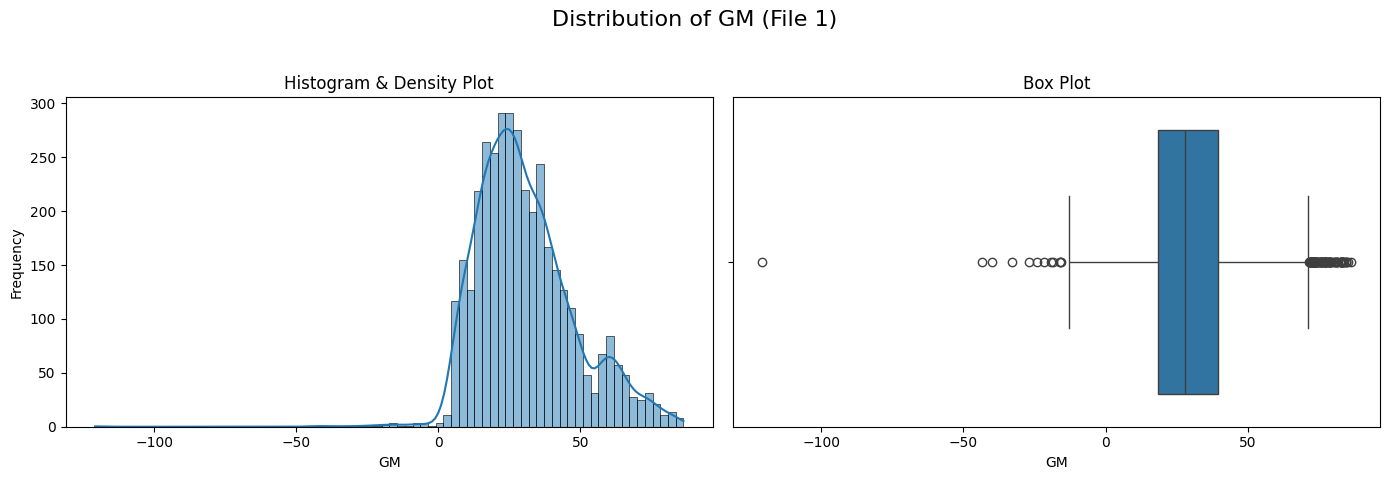

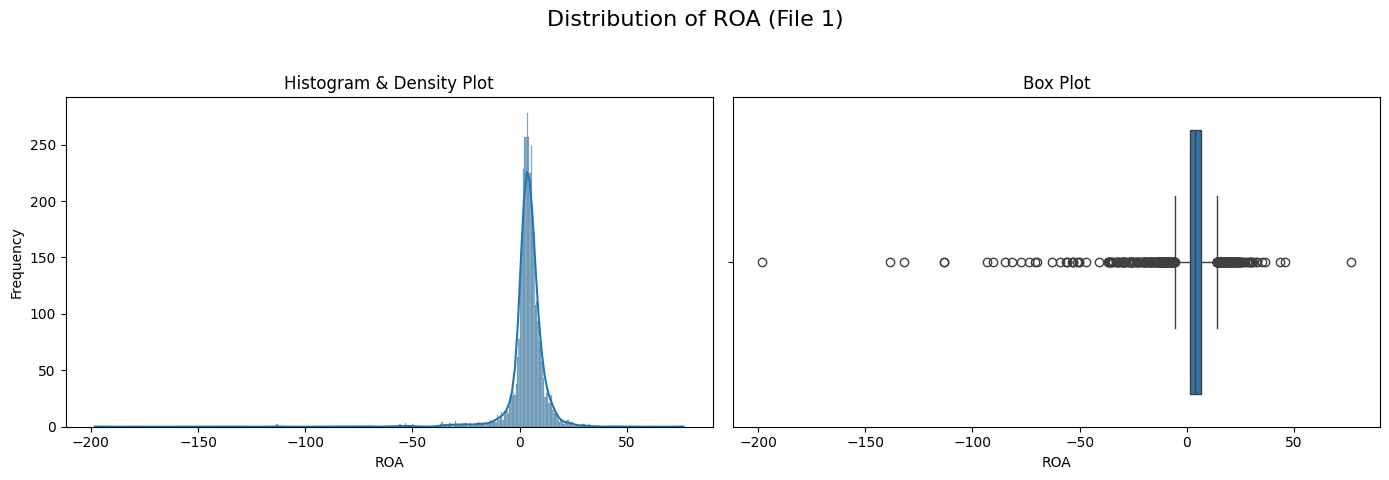

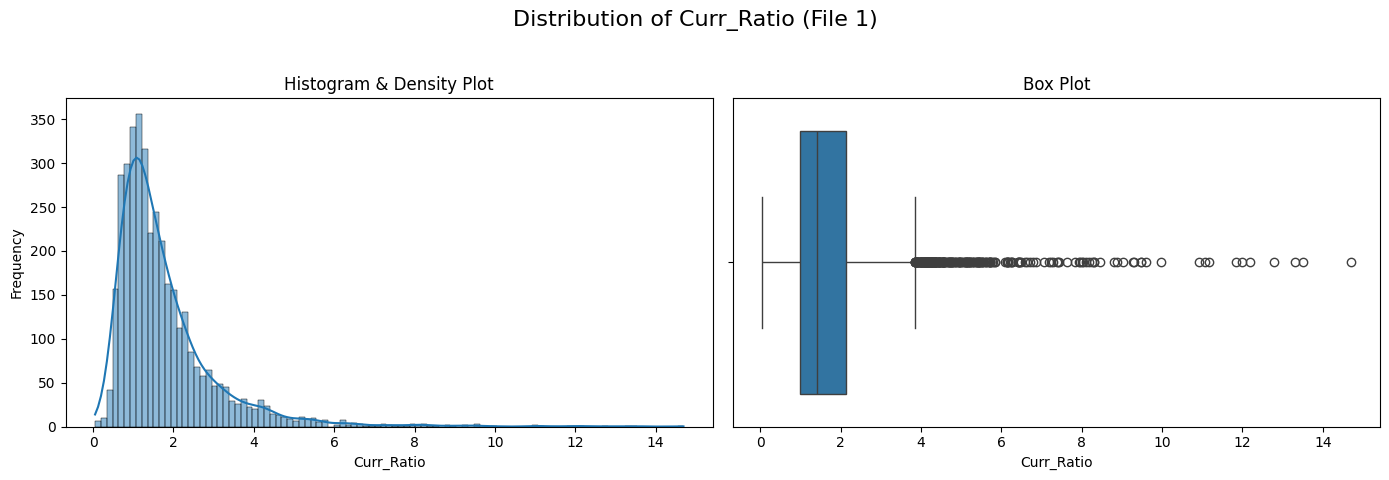

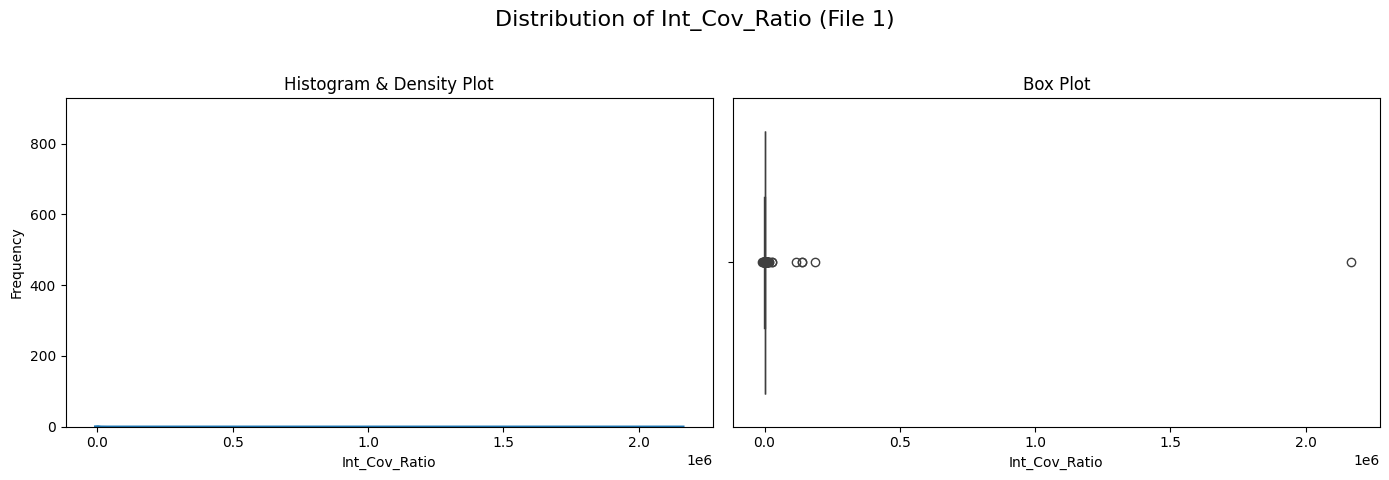

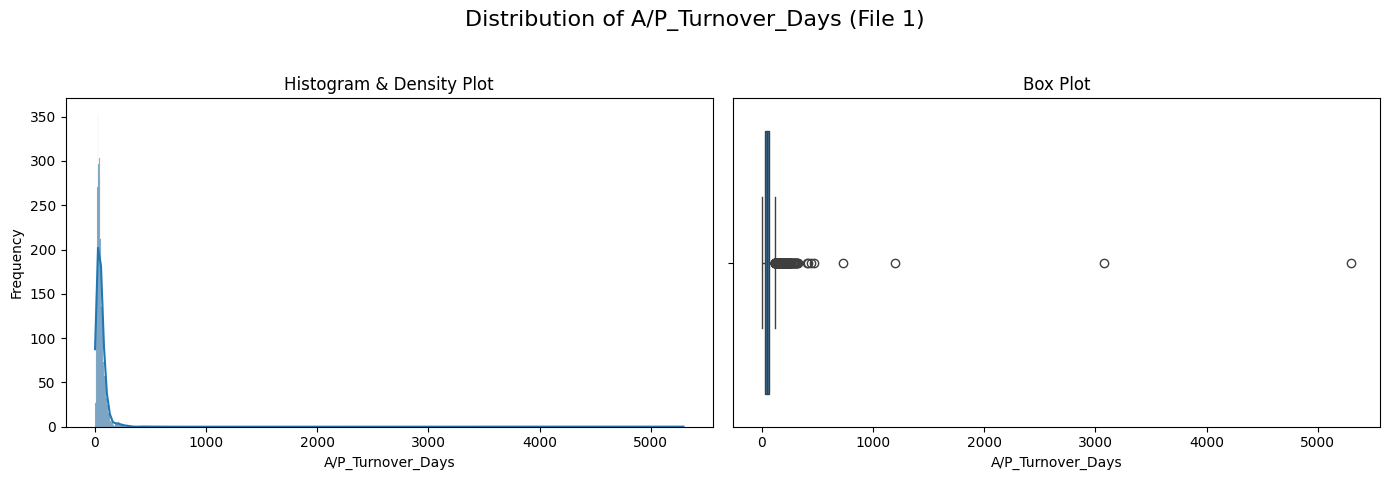

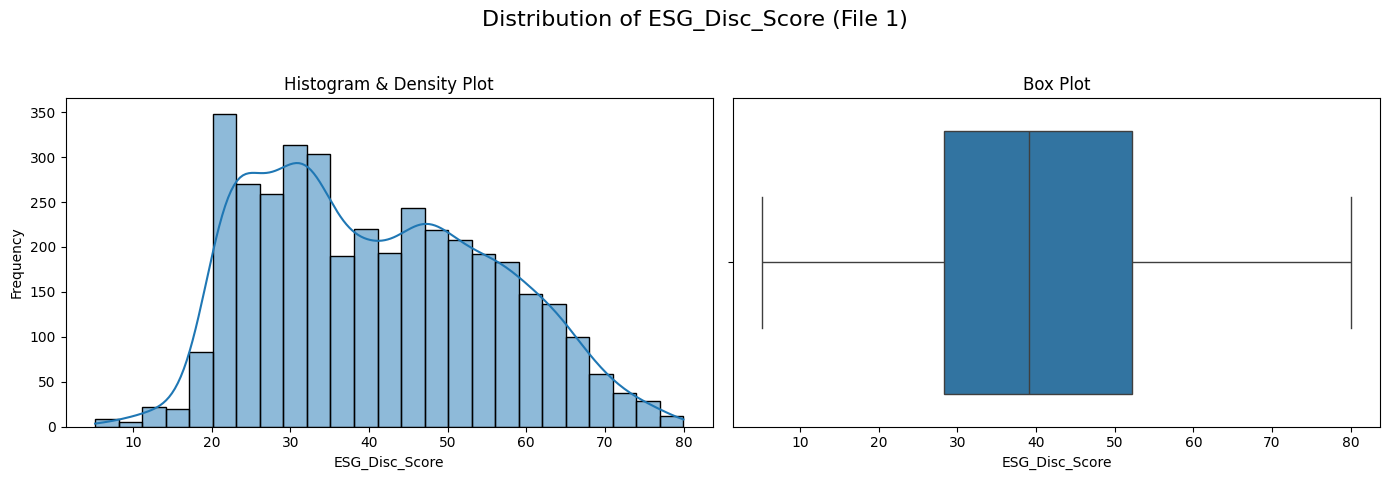


--- Visualizations for File 2 (Financially Complete Data) ---


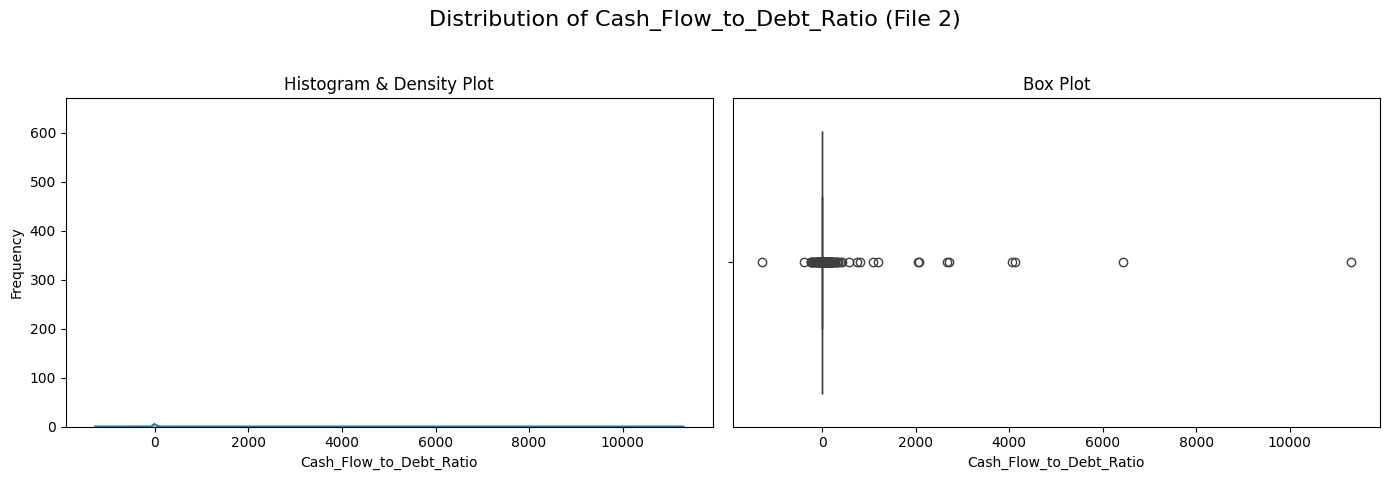

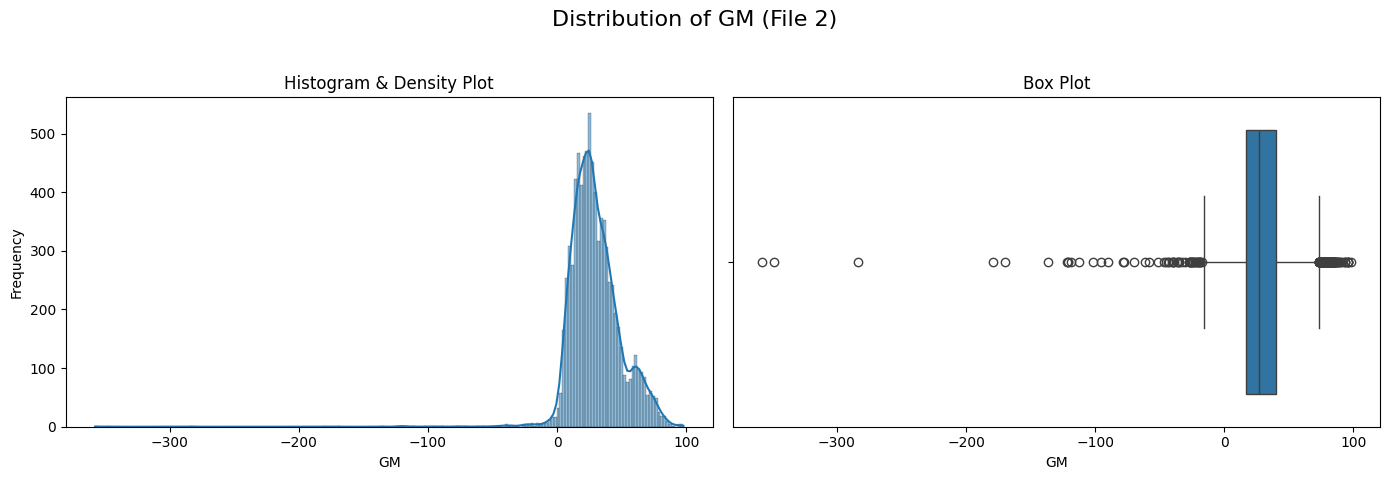

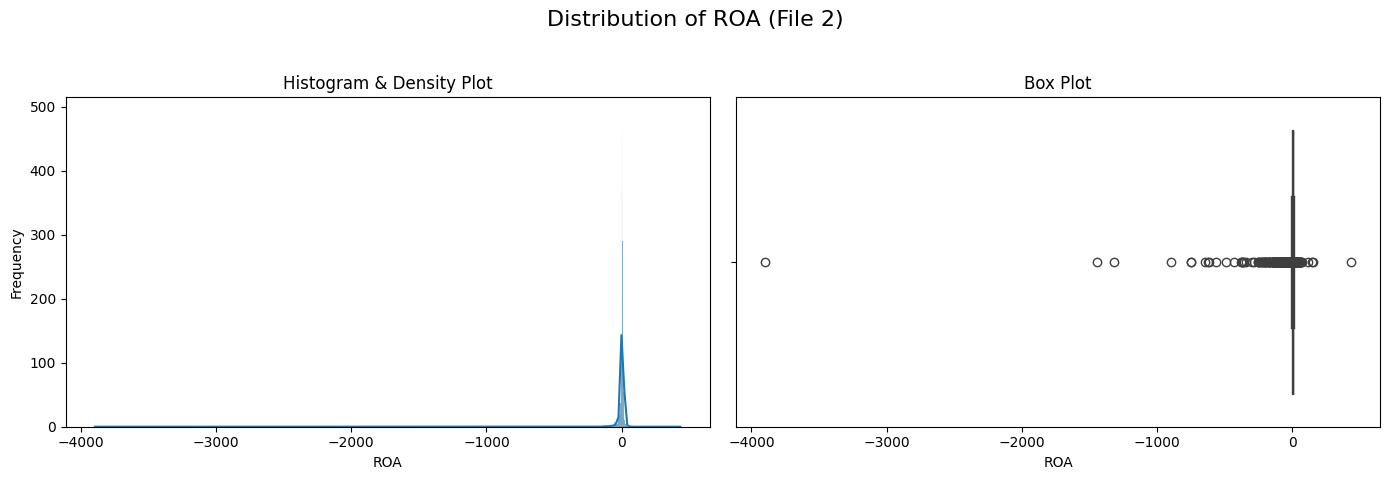

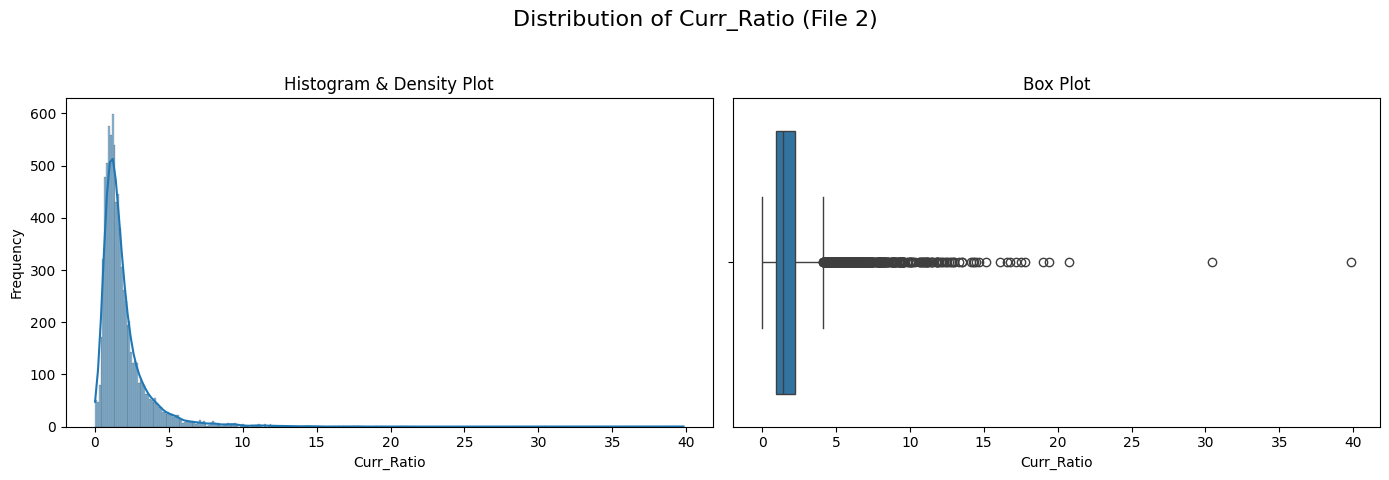

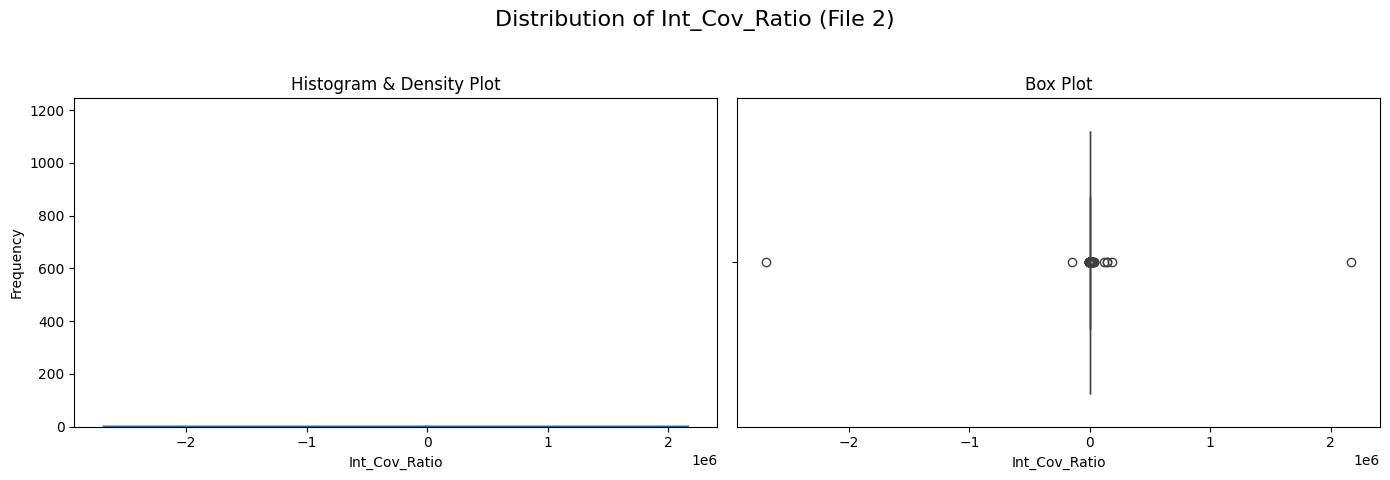

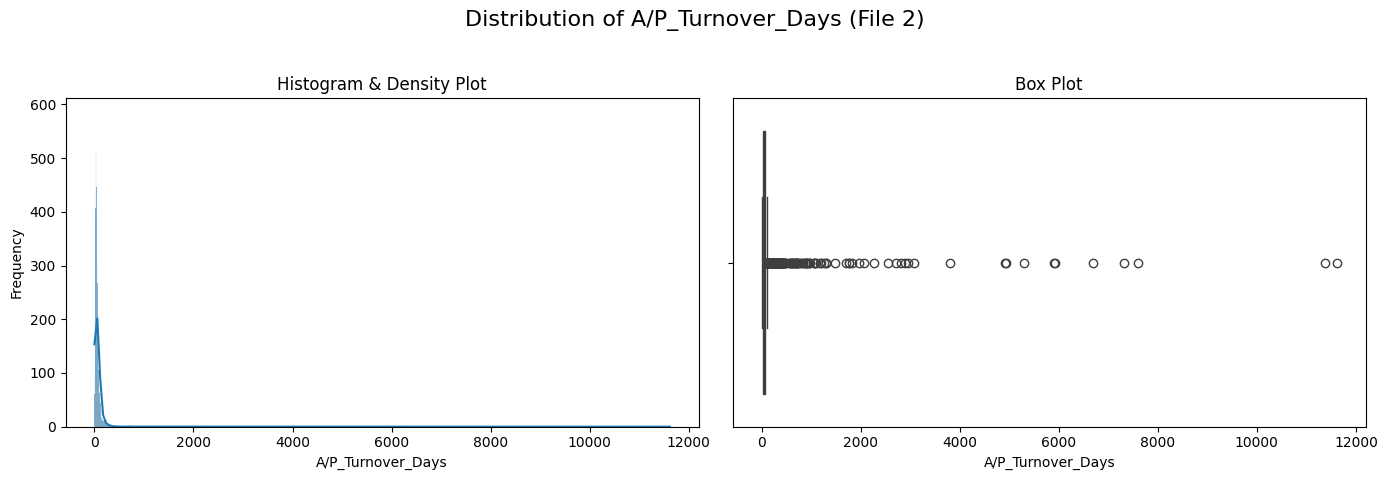

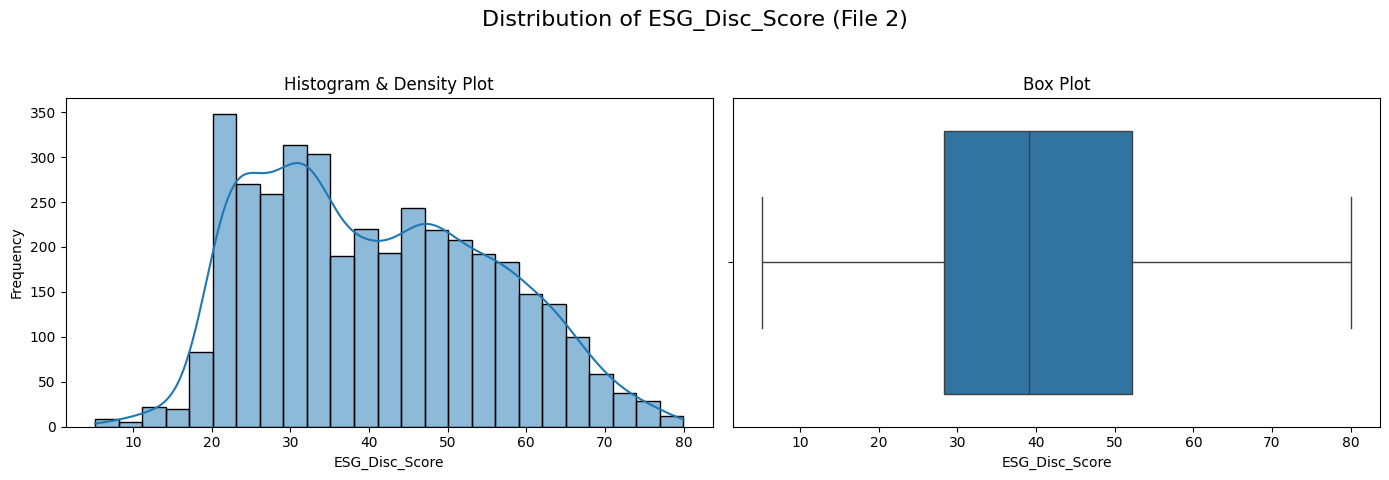

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume df1_final and df2_final are your loaded DataFrames ---

# 1. Define the list of key variables you want to visualize
# It's best to focus on your key ratios and target variables
columns_to_visualize = [
    'Cash_Flow_to_Debt_Ratio',
    'GM',
    'ROA',
    'Curr_Ratio',
    'Int_Cov_Ratio',
    'A/P_Turnover_Days',
    'ESG_Disc_Score' # Visualize the main ESG score
]

# --- Function to create plots (to avoid repeating code) ---
def plot_distributions(df, title_suffix):
    """
    This function takes a DataFrame and a title suffix, then generates
    a histogram and box plot for each column in columns_to_visualize.
    """
    for col in columns_to_visualize:
        # Check if the column exists in the DataFrame before plotting
        if col in df.columns:
            # Create a figure with two subplots, side by side
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            fig.suptitle(f'Distribution of {col} ({title_suffix})', fontsize=16)

            # --- Subplot 1: Histogram with Density Plot (KDE) ---
            sns.histplot(df[col], kde=True, ax=axes[0])
            axes[0].set_title('Histogram & Density Plot')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')

            # --- Subplot 2: Box Plot ---
            sns.boxplot(x=df[col], ax=axes[1])
            axes[1].set_title('Box Plot')
            axes[1].set_xlabel(col)

            # Display the plots
            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
            plt.show()

# --- Generate and display plots for both files ---
print("--- Visualizations for File 1 (Fully Complete Data) ---")
plot_distributions(df1_final, "File 1")

print("\n--- Visualizations for File 2 (Financially Complete Data) ---")
plot_distributions(df2_final, "File 2")

# **Phase 2: Classification Analysis (Predicting the Category of Risk) - ESG Disclosure Score**

## **Step 2.0: Library Imports and Data Loading**
The code is performing two fundamental setup tasks:

1. **Importing Libraries:** It loads all the necessary Python libraries for data manipulation (pandas, numpy), visualisation (seaborn, matplotlib), and machine learning (sklearn, imblearn, xgboost, lightgbm, shap).

2. **Loading Data:** It reads two primary Excel files into pandas DataFrames, making them available for the analysis that follows.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Pre-processing and Modeling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Evaluation and Interpretation
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay

# --- Load Initial Data ---
# Make sure files are in the same directory as notebook
try:
    df1_final = pd.read_excel("File1_with_Risk_Category.xlsx")
    df2_final = pd.read_excel("File2_with_Risk_Category.xlsx")
    print("Successfully loaded File1_with_Risk_Category.xlsx and File2_with_Risk_Category.xlsx")
except FileNotFoundError:
    print("ERROR: Make sure Excel files are in the same folder as this notebook.")


Successfully loaded File1_with_Risk_Category.xlsx and File2_with_Risk_Category.xlsx


## **Step 2.1: Final Data Preparation**

*   Defining predictor variables (the financial ratios and ESG score) and your target variable (Risk_Category).
*   Splitting the data into an 80% training set and a 20% testing set.
*   Applying SMOTE to the training set to handle class imbalance.
*   Scaling the features.


In [12]:
print("================== STEP 1: FINAL DATA PREPARATION ==================\n")

def prepare_data(df, file_name):
    """
    This function encapsulates all data preparation steps in a robust manner,
    ensuring data types and column names are preserved.
    """
    print(f"--- Preparing data for {file_name} ---")

    # a. Define Predictors (X) and Target (y)
    base_predictor_cols = [
        'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr',
        'A/P_Turnover_Days', 'W/K_Cap_Tur', 'Int_Cov_Ratio', 'ESG_Disc_Score'
    ]
    predictor_cols = base_predictor_cols + ['ESG_Disc_Score_Flag'] if 'ESG_Disc_Score_Flag' in df.columns else base_predictor_cols
    X = df[predictor_cols].copy()
    y = df['Risk_Category']

    if X.isnull().sum().any():
        median_esg_score = X['ESG_Disc_Score'].median()
        X['ESG_Disc_Score'].fillna(median_esg_score, inplace=True)

    # b. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # c. Apply SMOTE to Training Data
    print("Applying SMOTE to the training data...")
    smote = SMOTE(random_state=42)
    X_train_smote_np, y_train_smote = smote.fit_resample(X_train, y_train)
    # --- ROBUSTNESS FIX: Convert SMOTE output back to DataFrame ---
    # This preserves the column names for later steps.
    X_train_smote = pd.DataFrame(X_train_smote_np, columns=X_train.columns)

    # d. Scale Features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_smote_scaled_np = scaler.fit_transform(X_train_smote)
    X_test_scaled_np = scaler.transform(X_test)
    # --- ROBUSTNESS FIX: Convert scaled arrays back to DataFrames ---
    # This ensures consistency and prevents errors in plotting functions.
    X_train_smote_scaled = pd.DataFrame(X_train_smote_scaled_np, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=X_test.columns)

    print(f"Data preparation for {file_name} complete.\n")

    return X_train_smote, X_test, y_train_smote, y_test, X_train_smote_scaled, X_test_scaled, scaler

# Prepare data for both files
X1_train_smote, X1_test, y1_train_smote, y1_test, X1_train_smote_scaled, X1_test_scaled, scaler1 = prepare_data(df1_final, "File 1")
X2_train_smote, X2_test, y2_train_smote, y2_test, X2_train_smote_scaled, X2_test_scaled, scaler2 = prepare_data(df2_final, "File 2")


================== STEP 1: FINAL DATA PREPARATION ==================

--- Preparing data for File 1 ---
Applying SMOTE to the training data...
Scaling features...
Data preparation for File 1 complete.

--- Preparing data for File 2 ---
Applying SMOTE to the training data...
Scaling features...
Data preparation for File 2 complete.



/tmp/ipython-input-12-3240483706.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['ESG_Disc_Score'].fillna(median_esg_score, inplace=True)


## **Step 2.2: K-Fold Cross-Validation (Model Stability)**

--- 1. K-Fold Cross-Validation (Model Stability) ---

Imputing missing values in full datasets for K-Fold analysis...
No missing numeric values found in File 1.
Imputed missing values in 'ESG_Disc_Score' for File 2.
Imputed missing values in 'Env_Disc_Sc' for File 2.
Imputed missing values in 'Soc_Disc_Sc' for File 2.
Imputed missing values in 'Gov_Disc_Sc' for File 2.
Imputation complete.

Running MANUAL K-Fold analysis for File 1...

  Testing model: Logistic Regression
      Fold 1 F1-Score: 0.8308
      Fold 2 F1-Score: 0.7752
      Fold 3 F1-Score: 0.7996


/tmp/ipython-input-13-2626264646.py:95: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


      Fold 4 F1-Score: 0.8439
      Fold 5 F1-Score: 0.8193
      Fold 6 F1-Score: 0.8092
      Fold 7 F1-Score: 0.7852
      Fold 8 F1-Score: 0.8076
      Fold 9 F1-Score: 0.7959
      Fold 10 F1-Score: 0.7947
  --> Logistic Regression: Mean F1-Score: 0.8062 (Std: 0.0197)

  Testing model: Random Forest
      Fold 1 F1-Score: 0.9341
      Fold 2 F1-Score: 0.8912
      Fold 3 F1-Score: 0.9171
      Fold 4 F1-Score: 0.9193
      Fold 5 F1-Score: 0.9077
      Fold 6 F1-Score: 0.9080
      Fold 7 F1-Score: 0.9130
      Fold 8 F1-Score: 0.9101
      Fold 9 F1-Score: 0.9177
      Fold 10 F1-Score: 0.8813
  --> Random Forest: Mean F1-Score: 0.9100 (Std: 0.0140)

  Testing model: XGBoost
      Fold 1 F1-Score: 0.9843


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 2 F1-Score: 0.9605
      Fold 3 F1-Score: 0.9573


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 4 F1-Score: 0.9714
      Fold 5 F1-Score: 0.9499


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 6 F1-Score: 0.9684
      Fold 7 F1-Score: 0.9736


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 8 F1-Score: 0.9609
      Fold 9 F1-Score: 0.9630


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 10 F1-Score: 0.9345
  --> XGBoost: Mean F1-Score: 0.9624 (Std: 0.0130)

  Testing model: LightGBM
[LightGBM] [Info] Number of positive: 2518, number of negative: 2518
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5606
[LightGBM] [Info] Number of data points in the train set: 5036, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
      Fold 1 F1-Score: 0.9868
[LightGBM] [Info] Number of positive: 2518, number of negative: 2518
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Total Bins 5605
[LightGBM] [Info] Number of data points in the train set: 5036, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
      Fold 2 F1-Score: 0.9656
[LightGBM] [Info] Number of positive: 2517, number of negative: 2517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5607
[LightGBM] [Info] Number of data points in the train set: 5034, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 3 F1-Score: 0.9787
[LightGBM] [Info] Number of positive: 2517, number of negative: 2517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5604
[LightGBM] [Info] Number of data points in the train set: 5034, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
      Fold 4 F1-Score: 0.9712
[LightGBM] [Info] Number of positive: 2517, number of negative: 2517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5608
[LightGBM] [Info] Number of data points in the train set: 5034, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 5 F1-Score: 0.9629
[LightGBM] [Info] Number of positive: 2517, number of negative: 2517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5608
[LightGBM] [Info] Number of data points in the train set: 5034, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
      Fold 6 F1-Score: 0.9685
[LightGBM] [Info] Number of positive: 2517, number of negative: 2517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5606
[LightGBM] [Info] Number of data points in the train set: 5034, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 7 F1-Score: 0.9789
[LightGBM] [Info] Number of positive: 2517, number of negative: 2517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5605
[LightGBM] [Info] Number of data points in the train set: 5034, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
      Fold 8 F1-Score: 0.9636
[LightGBM] [Info] Number of positive: 2517, number of negative: 2517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5606
[LightGBM] [Info] Number of data points in the train set: 5034, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 9 F1-Score: 0.9736
[LightGBM] [Info] Number of positive: 2518, number of negative: 2518
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5606
[LightGBM] [Info] Number of data points in the train set: 5036, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
      Fold 10 F1-Score: 0.9426
  --> LightGBM: Mean F1-Score: 0.9693 (Std: 0.0114)

  Testing model: AdaBoost
      Fold 1 F1-Score: 0.8916
      Fold 2 F1-Score: 0.8384
      Fold 3 F1-Score: 0.9039
      Fold 4 F1-Score: 0.8684
      Fold 5 F1-Score: 0.8554
      Fold 6 F1-Score: 0.8583
      Fold 7 F1-Score: 0.8476
      Fold 8 F1-Score: 0.8554
      Fold 9 F1-Score: 0.8914
      Fold 10 F1-Score: 0.8550
  --> AdaBoost: Mean F1-Score: 0.8666 (Std: 0.0206)


/tmp/ipython-input-13-2626264646.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='F1-Score', data=plot_df, palette='Set2')


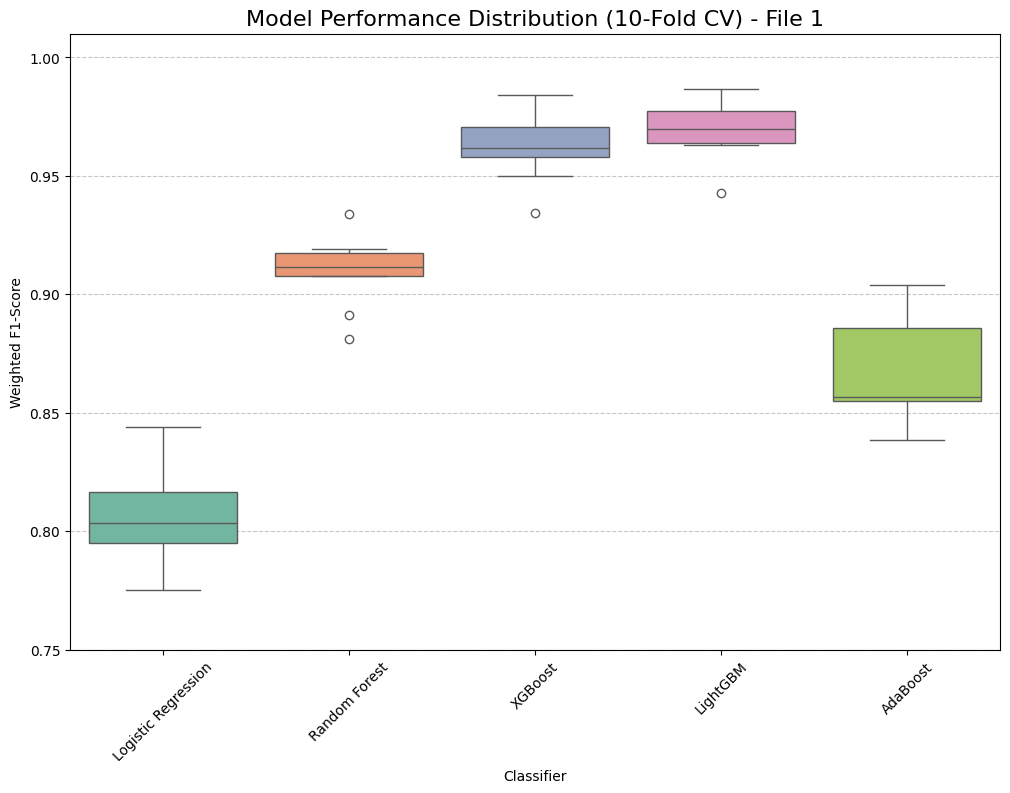


Running MANUAL K-Fold analysis for File 2...

  Testing model: Logistic Regression
      Fold 1 F1-Score: 0.8165
      Fold 2 F1-Score: 0.8006
      Fold 3 F1-Score: 0.8198
      Fold 4 F1-Score: 0.8062
      Fold 5 F1-Score: 0.7929
      Fold 6 F1-Score: 0.8019
      Fold 7 F1-Score: 0.8058
      Fold 8 F1-Score: 0.8097
      Fold 9 F1-Score: 0.8127
      Fold 10 F1-Score: 0.8122
  --> Logistic Regression: Mean F1-Score: 0.8078 (Std: 0.0076)

  Testing model: Random Forest
      Fold 1 F1-Score: 0.9179
      Fold 2 F1-Score: 0.9350
      Fold 3 F1-Score: 0.9094
      Fold 4 F1-Score: 0.9002
      Fold 5 F1-Score: 0.9077
      Fold 6 F1-Score: 0.9022
      Fold 7 F1-Score: 0.9056
      Fold 8 F1-Score: 0.9216
      Fold 9 F1-Score: 0.9144
      Fold 10 F1-Score: 0.9301
  --> Random Forest: Mean F1-Score: 0.9144 (Std: 0.0111)

  Testing model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 1 F1-Score: 0.9818


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 2 F1-Score: 0.9878


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 3 F1-Score: 0.9744


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 4 F1-Score: 0.9781


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 5 F1-Score: 0.9743


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 6 F1-Score: 0.9744


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 7 F1-Score: 0.9646


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:11:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 8 F1-Score: 0.9829


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:11:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 9 F1-Score: 0.9793


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:11:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Fold 10 F1-Score: 0.9792
  --> XGBoost: Mean F1-Score: 0.9777 (Std: 0.0060)

  Testing model: LightGBM
[LightGBM] [Info] Number of positive: 4671, number of negative: 4671
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5571
[LightGBM] [Info] Number of data points in the train set: 9342, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 1 F1-Score: 0.9757
[LightGBM] [Info] Number of positive: 4672, number of negative: 4672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5574
[LightGBM] [Info] Number of data points in the train set: 9344, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 2 F1-Score: 0.9854
[LightGBM] [Info] Number of positive: 4672, number of negative: 4672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5576
[LightGBM] [Info] Number of data points in the train set: 9344, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 3 F1-Score: 0.9841
[LightGBM] [Info] Number of positive: 4672, number of negative: 4672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5573
[LightGBM] [Info] Number of data points in the train set: 9344, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
      Fold 4 F1-Score: 0.9817
[LightGBM] [Info] Number of positive: 4672, number of negative: 4672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5577
[LightGBM] [Info] Number of data points in the train set: 9344, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
      Fold 5 F1-Score: 0.9743
[LightGBM] [Info] Number of positive: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 6 F1-Score: 0.9756
[LightGBM] [Info] Number of positive: 4672, number of negative: 4672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5573
[LightGBM] [Info] Number of data points in the train set: 9344, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 7 F1-Score: 0.9682
[LightGBM] [Info] Number of positive: 4672, number of negative: 4672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5575
[LightGBM] [Info] Number of data points in the train set: 9344, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 8 F1-Score: 0.9732
[LightGBM] [Info] Number of positive: 4672, number of negative: 4672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5569
[LightGBM] [Info] Number of data points in the train set: 9344, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 9 F1-Score: 0.9830
[LightGBM] [Info] Number of positive: 4672, number of negative: 4672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5574
[LightGBM] [Info] Number of data points in the train set: 9344, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


      Fold 10 F1-Score: 0.9780
  --> LightGBM: Mean F1-Score: 0.9779 (Std: 0.0052)

  Testing model: AdaBoost
      Fold 1 F1-Score: 0.8948
      Fold 2 F1-Score: 0.8993
      Fold 3 F1-Score: 0.8788
      Fold 4 F1-Score: 0.8869
      Fold 5 F1-Score: 0.9016
      Fold 6 F1-Score: 0.8629
      Fold 7 F1-Score: 0.8865
      Fold 8 F1-Score: 0.8840
      Fold 9 F1-Score: 0.8797
      Fold 10 F1-Score: 0.8995
  --> AdaBoost: Mean F1-Score: 0.8874 (Std: 0.0114)


/tmp/ipython-input-13-2626264646.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='F1-Score', data=plot_df, palette='Set2')


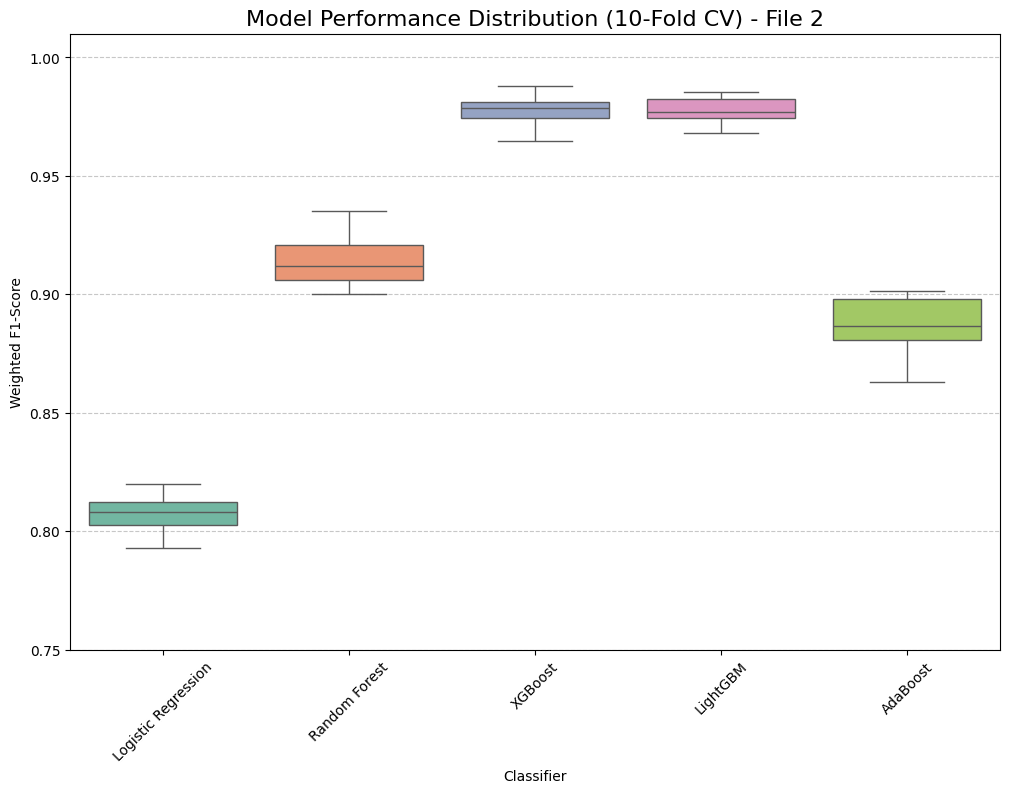

In [13]:
print("--- 1. K-Fold Cross-Validation (Model Stability) ---")

models_kfold = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# This import is needed for the F1-score calculation inside the loop
from sklearn.metrics import f1_score

def run_kfold_analysis_manual(X, y, file_name):
    print(f"\nRunning MANUAL K-Fold analysis for {file_name}...")

    # This will store the final results for the boxplot
    plot_df_data = {'Model': [], 'F1-Score': []}

    # Loop through each of the 5 models
    for name, model in models_kfold.items():
        print(f"\n  Testing model: {name}")

        # This list will store the 10 scores for the current model
        fold_scores = []

        # Create the 10-fold splitter
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        # --- THIS IS THE MANUAL LOOP ---
        # It will loop 10 times, once for each fold
        for fold_idx, (train_index, test_index) in enumerate(cv.split(X, y)):
            # print(f"    Running Fold {fold_idx + 1}/10...") # Optional: for more verbose output

            # 1. Split the data for this specific fold
            X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
            y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

            # 2. Apply SMOTE to the training data of this fold
            smote = SMOTE(random_state=42)
            X_train_fold_smote, y_train_fold_smote = smote.fit_resample(X_train_fold, y_train_fold)

            # 3. Scale the features for this fold
            scaler = StandardScaler()
            X_train_fold_scaled = scaler.fit_transform(X_train_fold_smote)
            X_test_fold_scaled = scaler.transform(X_test_fold)

            # 4. Train the model on this fold's processed training data
            model.fit(X_train_fold_scaled, y_train_fold_smote)

            # 5. Make predictions on this fold's processed test data
            predictions = model.predict(X_test_fold_scaled)

            # 6. Calculate and store the F1-score for this fold
            score = f1_score(y_test_fold, predictions, average='weighted')

            # --- NEW: Print the score for the current fold ---
            print(f"      Fold {fold_idx + 1} F1-Score: {score:.4f}")

            fold_scores.append(score)

        # After the 10 folds are complete, calculate the average and std dev
        print(f"  --> {name}: Mean F1-Score: {np.mean(fold_scores):.4f} (Std: {np.std(fold_scores):.4f})")

        # Add the 10 scores to our plot data
        plot_df_data['Model'].extend([name] * 10)
        plot_df_data['F1-Score'].extend(fold_scores)

    # --- Create the final boxplot ---
    plot_df = pd.DataFrame(plot_df_data)

    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Model', y='F1-Score', data=plot_df, palette='Set2')

    plt.title(f'Model Performance Distribution (10-Fold CV) - {file_name}', fontsize=16)
    plt.ylabel('Weighted F1-Score')
    plt.xlabel('Classifier')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0.75, 1.01)
    plt.show()

# --- Impute missing values before running K-Fold analysis ---
print("\nImputing missing values in full datasets for K-Fold analysis...")
df1_kfold = df1_final.copy()
df2_kfold = df2_final.copy()

def impute_numeric_nans(df, df_name):
    numeric_cols_with_nan = df.select_dtypes(include=np.number).isnull().sum()
    numeric_cols_with_nan = numeric_cols_with_nan[numeric_cols_with_nan > 0].index

    if not numeric_cols_with_nan.empty:
        for col in numeric_cols_with_nan:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputed missing values in '{col}' for {df_name}.")
    else:
        print(f"No missing numeric values found in {df_name}.")

impute_numeric_nans(df1_kfold, "File 1")
impute_numeric_nans(df2_kfold, "File 2")

print("Imputation complete.")

# --- Run for both files using the imputed dataframes ---
X1_kfold = df1_kfold.drop(columns=['Cash_Flow_to_Debt_Ratio', 'Risk_Category', 'Company_Ticker', 'Company_Name', 'Year'], errors='ignore')
y1_kfold = df1_kfold['Risk_Category']
run_kfold_analysis_manual(X1_kfold, y1_kfold, "File 1")

X2_kfold = df2_kfold.drop(columns=['Cash_Flow_to_Debt_Ratio', 'Risk_Category', 'Company_Ticker', 'Company_Name', 'Year'], errors='ignore')
y2_kfold = df2_kfold['Risk_Category']
run_kfold_analysis_manual(X2_kfold, y2_kfold, "File 2")



--- Generating Final Summaries ---

--- K-Fold Cross-Validation Summary Table for File 1 ---


,Model,Mean F1-Score,Std. Dev.
0,AdaBoost,0.8666,0.0217
1,LightGBM,0.9693,0.0121
2,Logistic Regression,0.8062,0.0208
3,Random Forest,0.9100,0.0148
4,XGBoost,0.9624,0.0137


/tmp/ipython-input-14-2170365607.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='F1-Score', data=plot_df, palette='Set2')


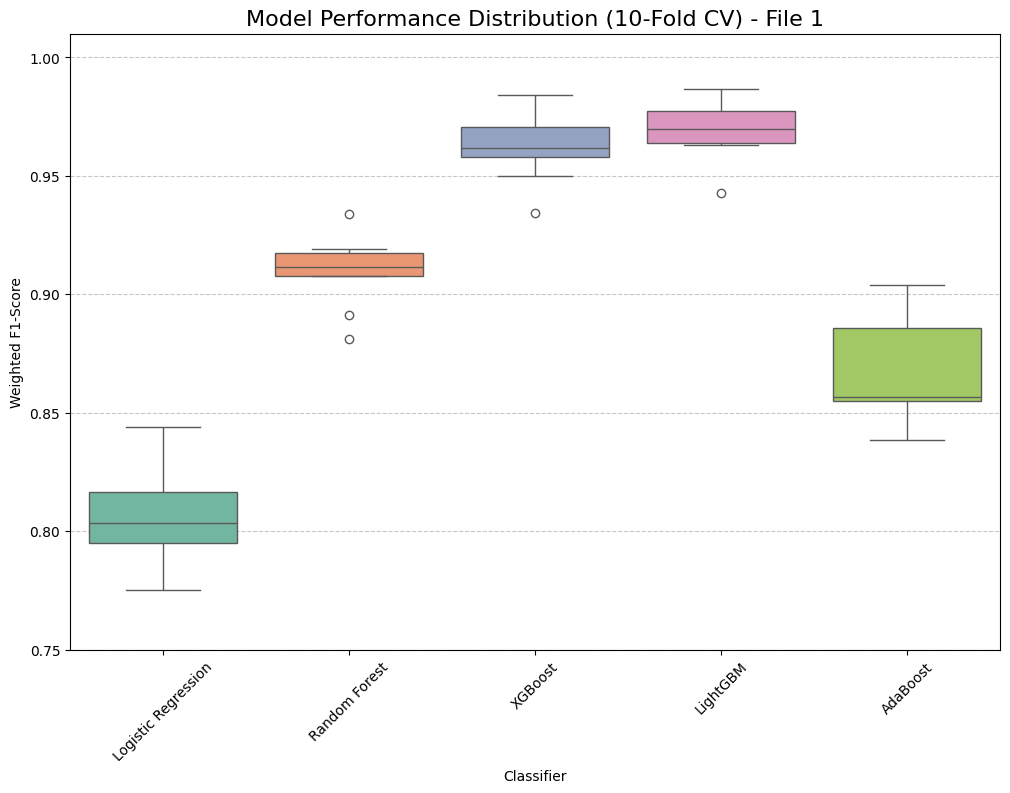


--- K-Fold Cross-Validation Summary Table for File 2 ---


,Model,Mean F1-Score,Std. Dev.
0,AdaBoost,0.8874,0.0120
1,LightGBM,0.9779,0.0055
2,Logistic Regression,0.8078,0.0080
3,Random Forest,0.9144,0.0117
4,XGBoost,0.9777,0.0063


/tmp/ipython-input-14-2170365607.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='F1-Score', data=plot_df, palette='Set2')


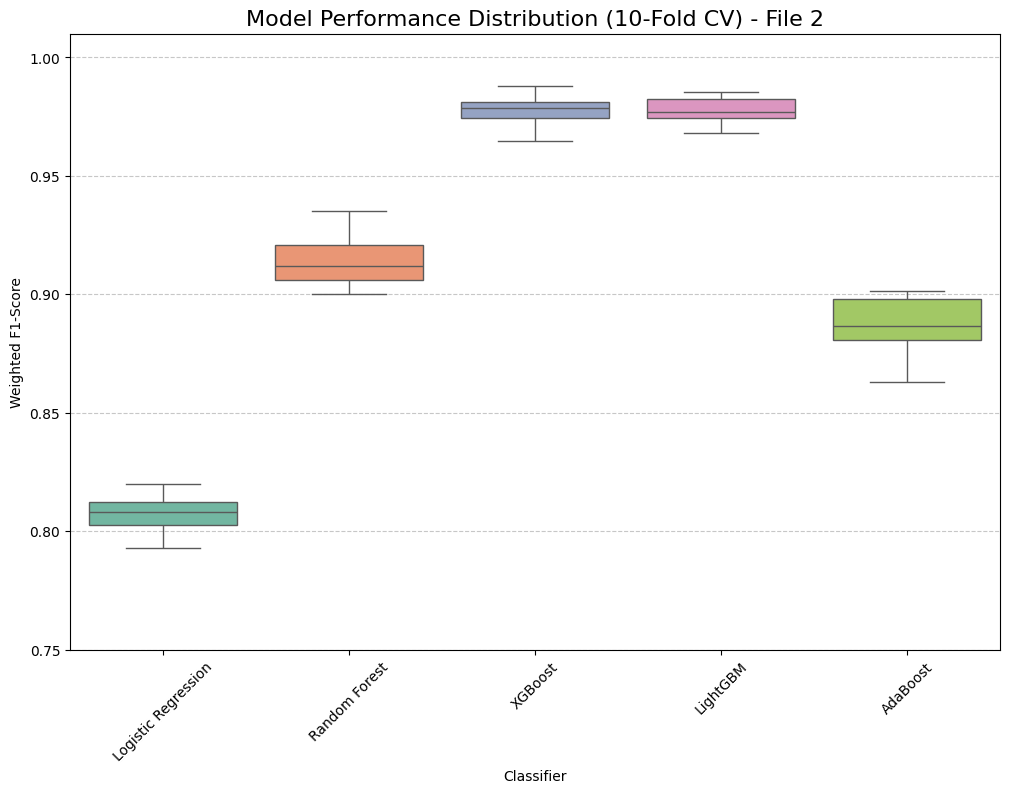

In [14]:
def create_summary_visuals(plot_df_data, file_name):
    """
    This function takes the results dictionary from the K-Fold loop and creates
    a final summary table and box plot.
    """

    # 1. Convert the results dictionary to a DataFrame for easier processing
    plot_df = pd.DataFrame(plot_df_data)

    # 2. Create the Summary Table by calculating the mean and standard deviation
    summary_table = plot_df.groupby('Model')['F1-Score'].agg(['mean', 'std']).reset_index()
    summary_table = summary_table.rename(columns={'mean': 'Mean F1-Score', 'std': 'Std. Dev.'})

    print(f"\n--- K-Fold Cross-Validation Summary Table for {file_name} ---")
    display(summary_table.style.format({'Mean F1-Score': '{:.4f}', 'Std. Dev.': '{:.4f}'}))

    # 3. Create the Final Box Plot to visualize the distribution of scores
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Model', y='F1-Score', data=plot_df, palette='Set2')

    plt.title(f'Model Performance Distribution (10-Fold CV) - {file_name}', fontsize=16)
    plt.ylabel('Weighted F1-Score')
    plt.xlabel('Classifier')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0.75, 1.01) # Zoom in on the y-axis for better visibility
    plt.show()

# --- Run the summary function for both files ---
# This code assumes that 'kfold_results1' and 'kfold_results2' were created
# by running the manual K-Fold analysis in the previous step.
try:
    print("\n--- Generating Final Summaries ---")
    create_summary_visuals(kfold_results1, "File 1")
    create_summary_visuals(kfold_results2, "File 2")
except NameError:
    print("ERROR: Please make sure you have run the 'Step 2A: K-Fold Cross-Validation (Capture Results)'")
    print("code block first to generate the 'kfold_results1' and 'kfold_results2' variables.")

## **Step 2.3: Model Training and Evaluation**

*   Hyperparameter Tuning: It finds the best settings for each model using GridSearchCV.
*   Final Evaluation: It tests the performance of the optimised models.
* Visualisation: It creates confusion matrices and feature importance plots to visualise the results.

### **Step 2.3A: Hyperparameter Tuning**

In [15]:
print("\n--- Step 3A: Hyperparameter Tuning (Finding the Best Model Settings) ---")

def find_best_hyperparameters(X_train_smote, y_train_smote, X_train_smote_scaled, file_name):
    """
    This function uses GridSearchCV to find the best hyperparameters for each model.
    """
    print(f"\nRunning Hyperparameter Tuning for {file_name}...")

    # Define the models and the grid of parameters to search for each
    param_grids = {
        "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['liblinear']},
        "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
        "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]},
        "LightGBM": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'num_leaves': [20, 31]},
        "AdaBoost": {'n_estimators': [50, 100], 'learning_rate': [0.1, 1.0]}
    }

    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": LGBMClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42)
    }

    best_params_dict = {}

    for name, model in models.items():
        print(f"  Tuning {name}...")

        # Use scaled data for Logistic Regression, original data for tree-based models
        X_train_data = X_train_smote_scaled if name == "Logistic Regression" else X_train_smote

        # GridSearchCV performs a cross-validated search over the parameter grid
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_data, y_train_smote)

        # Store the best parameters found
        best_params_dict[name] = grid_search.best_params_
        print(f"  --> Best parameters for {name}: {grid_search.best_params_}")

    return best_params_dict

# Run the tuning process for both files and store the results
best_params1 = find_best_hyperparameters(X1_train_smote, y1_train_smote, X1_train_smote_scaled, "File 1")
best_params2 = find_best_hyperparameters(X2_train_smote, y2_train_smote, X2_train_smote_scaled, "File 2")

print("\nHyperparameter tuning complete. The best parameters for each model have been found.")



--- Step 3A: Hyperparameter Tuning (Finding the Best Model Settings) ---

Running Hyperparameter Tuning for File 1...
  Tuning Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
  --> Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
  Tuning Random Forest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  --> Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
  Tuning XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:12:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  --> Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
  Tuning LightGBM...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 2237, number of negative: 2237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 4474, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
  --> Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
  Tuning AdaBoost...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  --> Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 100}

Running Hyperparameter Tuning for File 2...
  Tuning Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:15:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  --> Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
  Tuning LightGBM...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 4153, number of negative: 4153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2552
[LightGBM] [Info] Number of data points in the train set: 8306, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
  --> Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
  Tuning AdaBoost...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  --> Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 100}

Hyperparameter tuning complete. The best parameters for each model have been found.


### **Step 2.3B: Final Model Training and Evaluation**


--- Step 3B: Final Model Training and Evaluation (Using Best Hyperparameters) ---

Training final, optimized models for File 1...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 2237, number of negative: 2237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 4474, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


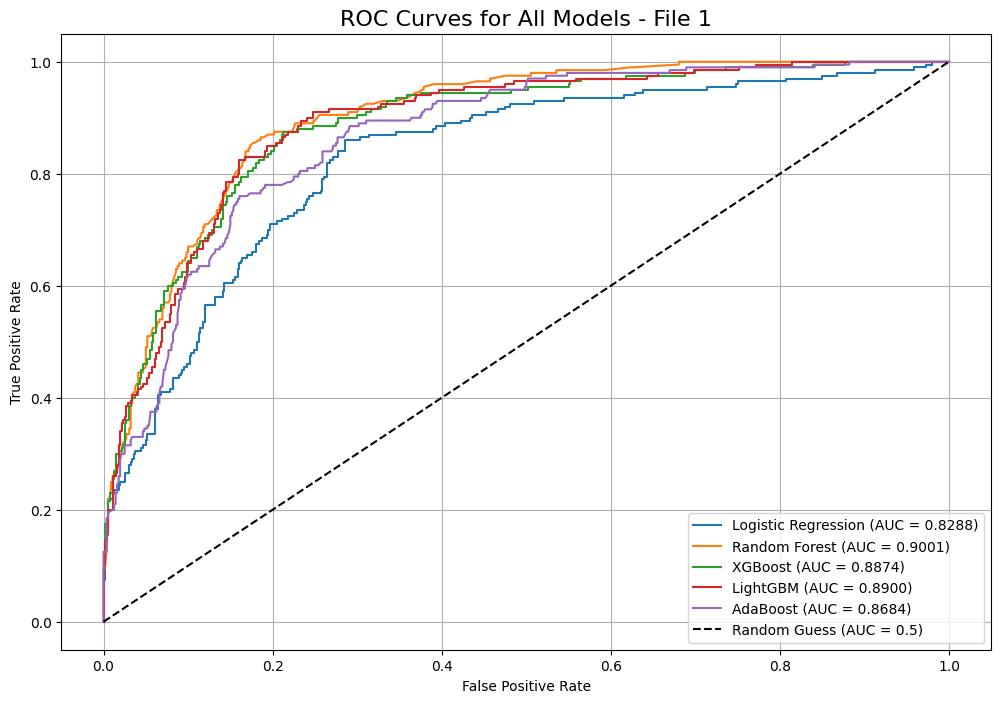


--- Overall Model Performance Summary for File 1 ---


,Model,Accuracy,AUC,Precision,Recall,F1-Score,Support
0,Logistic Regression,0.7513,0.8288,0.8064,0.7513,0.7644,760.000000
1,Random Forest,0.8329,0.9001,0.8464,0.8329,0.8373,760.000000
2,XGBoost,0.8276,0.8874,0.8397,0.8276,0.8318,760.000000
3,LightGBM,0.8289,0.8900,0.8345,0.8289,0.8312,760.000000
4,AdaBoost,0.7803,0.8684,0.8177,0.7803,0.7902,760.000000



--- Evaluation Plots for Logistic Regression (File 1) ---


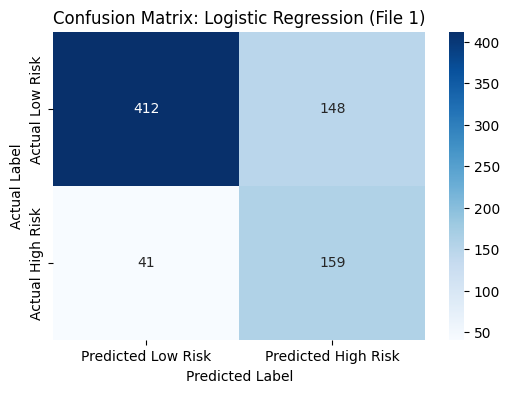

/tmp/ipython-input-16-3163083621.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())


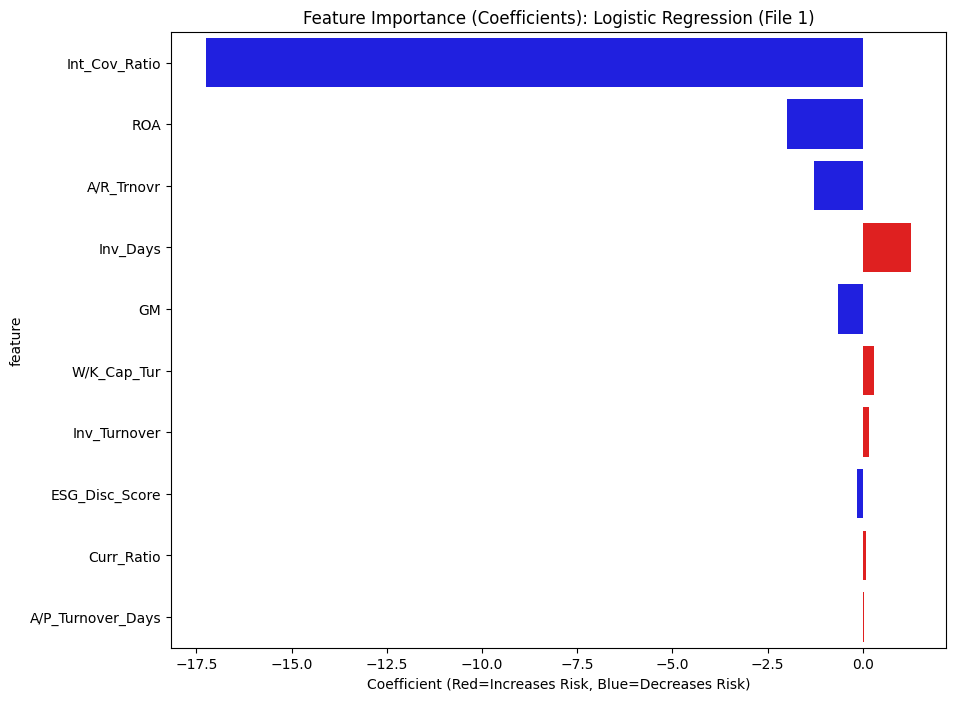


--- Evaluation Plots for Random Forest (File 1) ---


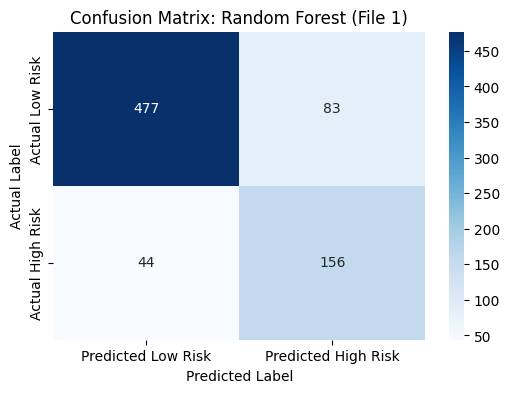

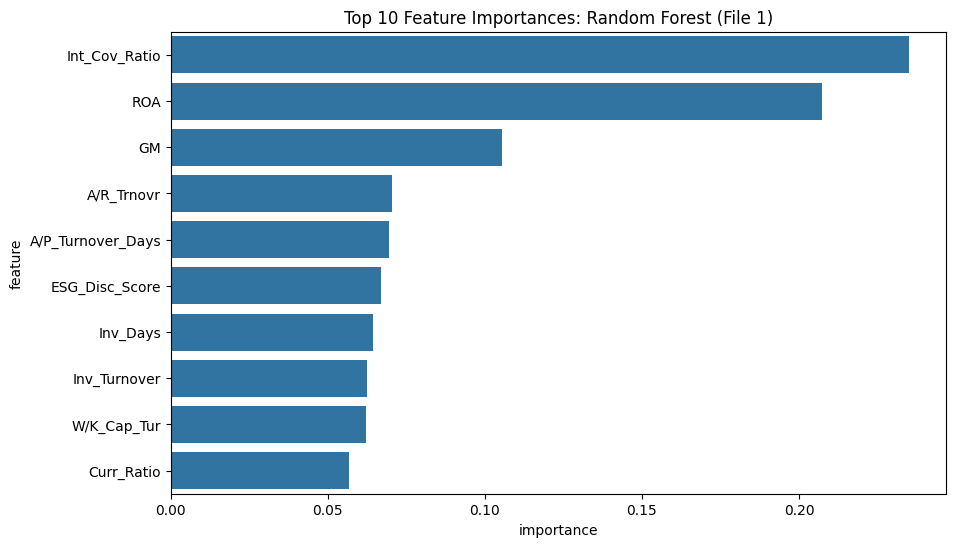


--- Evaluation Plots for XGBoost (File 1) ---


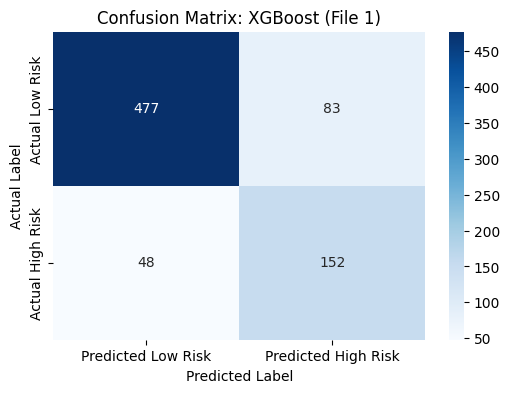

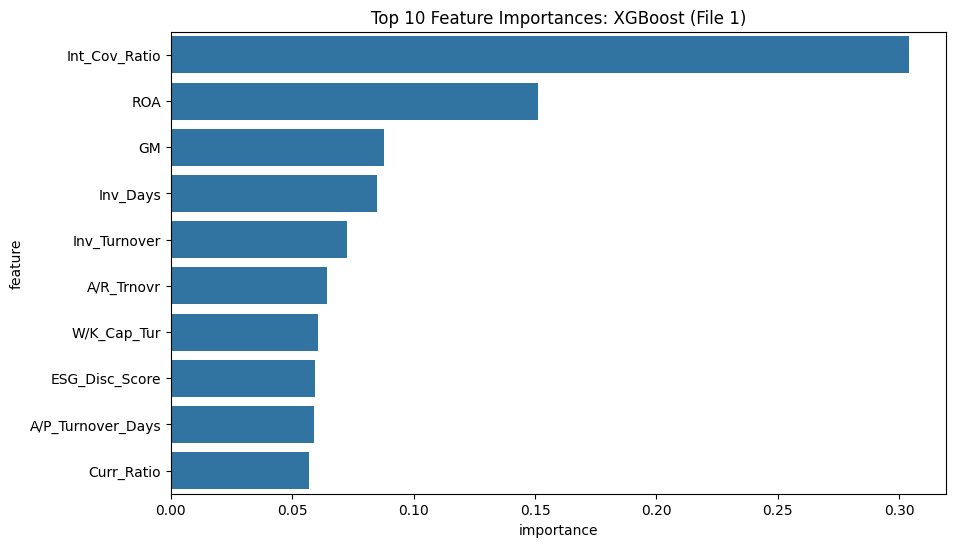


--- Evaluation Plots for LightGBM (File 1) ---


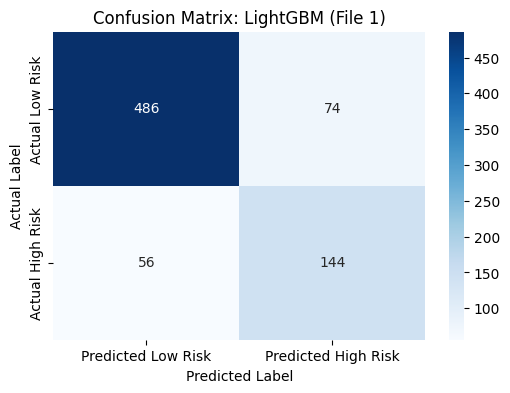

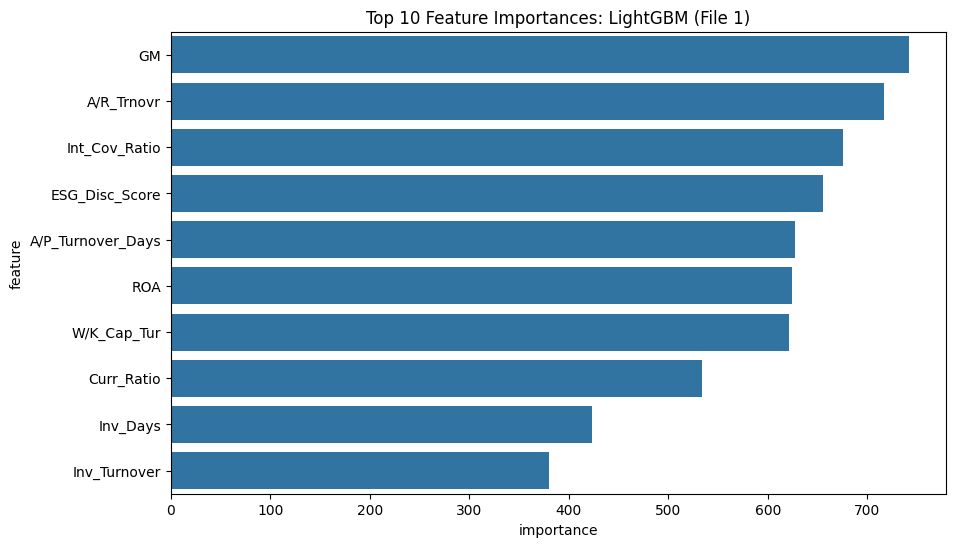


--- Evaluation Plots for AdaBoost (File 1) ---


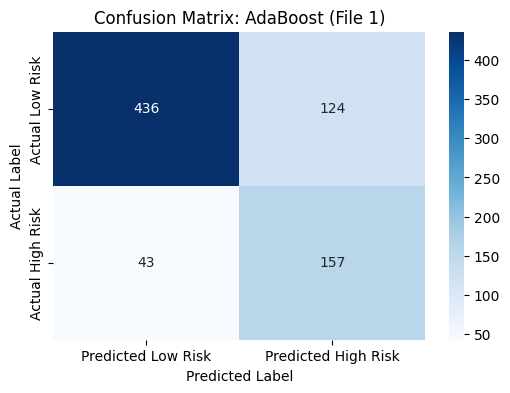

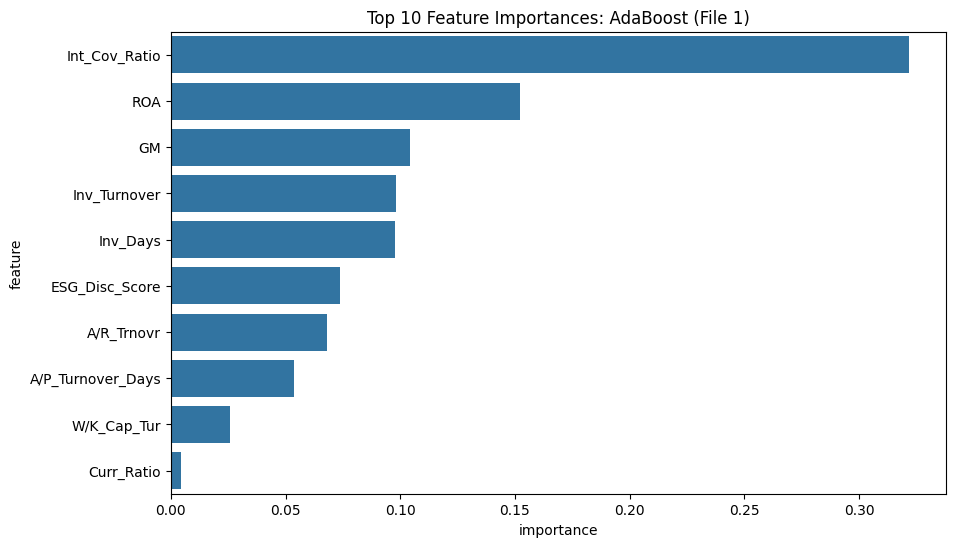


Training final, optimized models for File 2...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 4153, number of negative: 4153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2553
[LightGBM] [Info] Number of data points in the train set: 8306, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


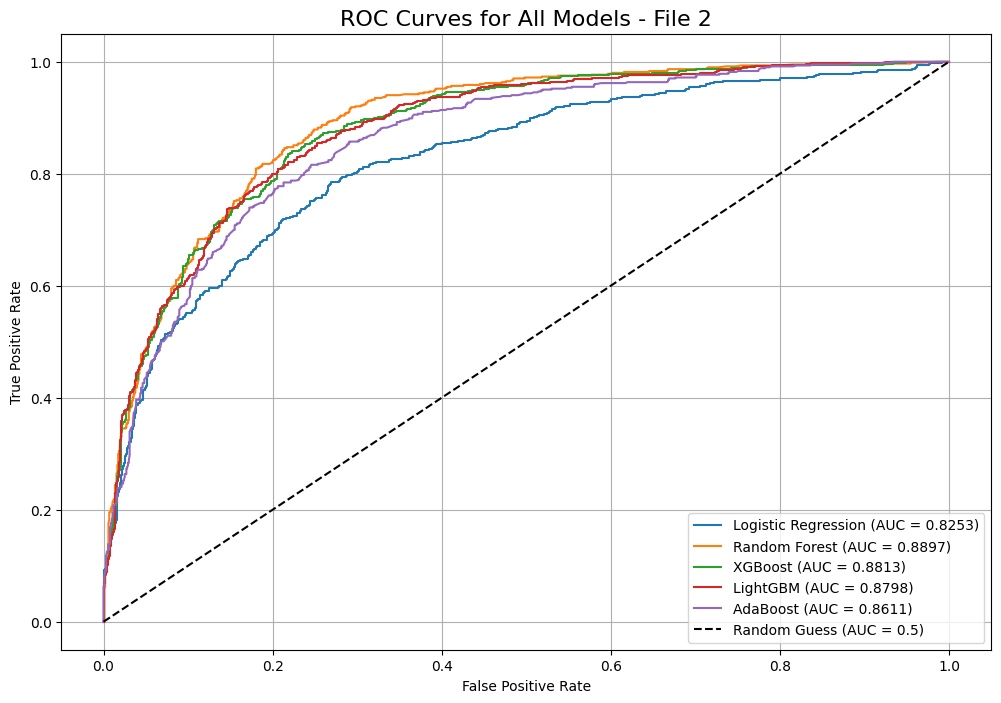


--- Overall Model Performance Summary for File 2 ---


,Model,Accuracy,AUC,Precision,Recall,F1-Score,Support
0,Logistic Regression,0.7605,0.8253,0.7626,0.7605,0.7614,1641.000000
1,Random Forest,0.8068,0.8897,0.8086,0.8068,0.8076,1641.000000
2,XGBoost,0.7995,0.8813,0.8023,0.7995,0.8006,1641.000000
3,LightGBM,0.8050,0.8798,0.8062,0.8050,0.8055,1641.000000
4,AdaBoost,0.7946,0.8611,0.7965,0.7946,0.7954,1641.000000



--- Evaluation Plots for Logistic Regression (File 2) ---


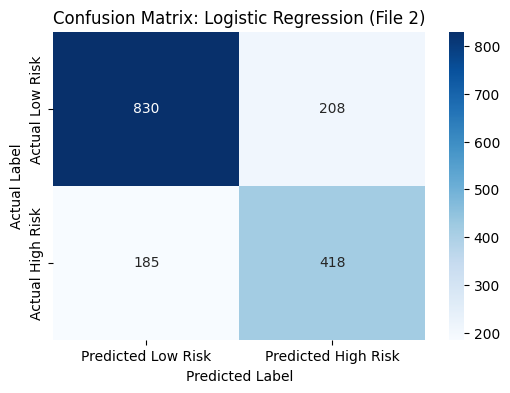

/tmp/ipython-input-16-3163083621.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())


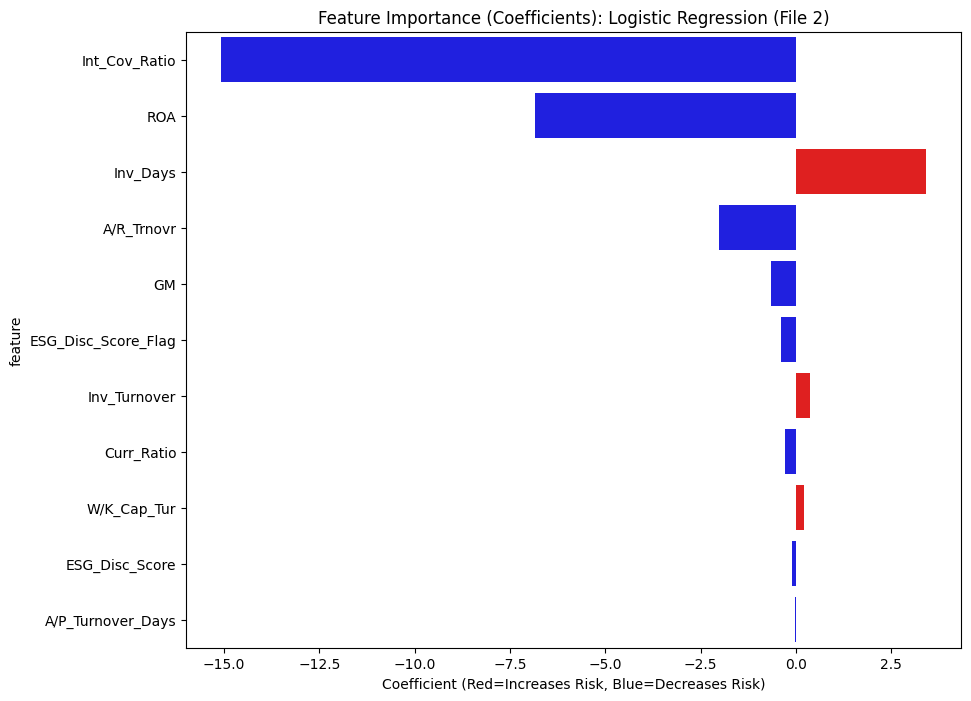


--- Evaluation Plots for Random Forest (File 2) ---


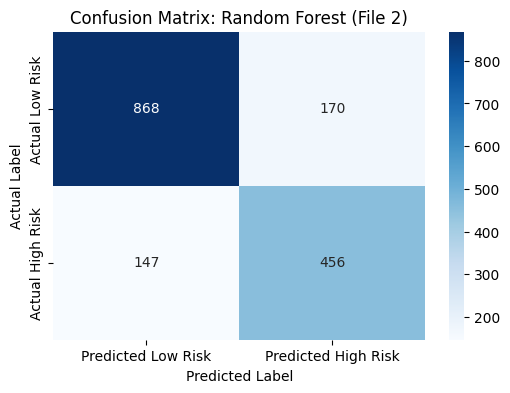

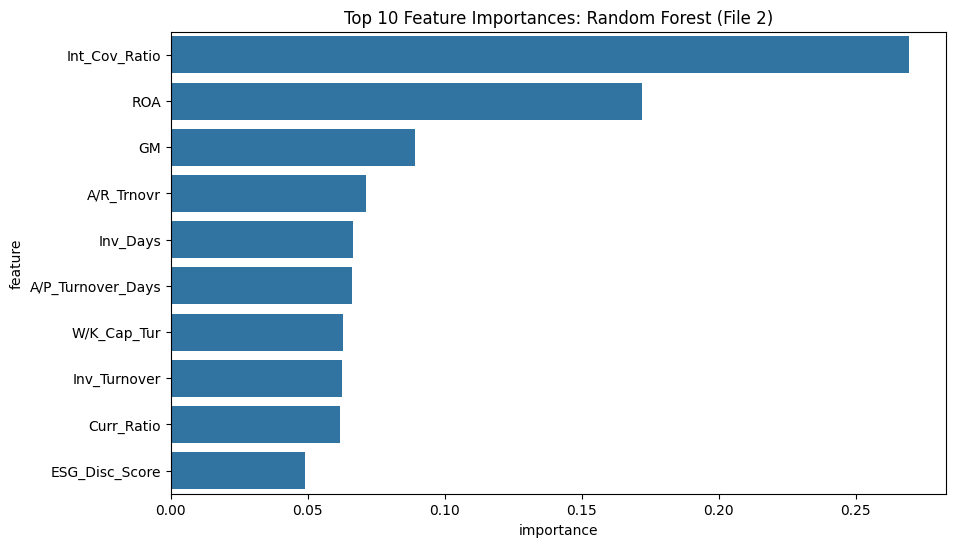


--- Evaluation Plots for XGBoost (File 2) ---


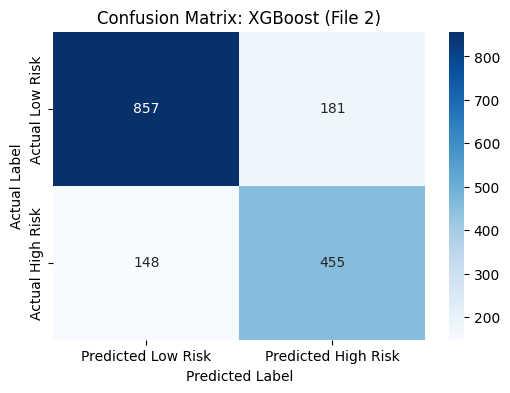

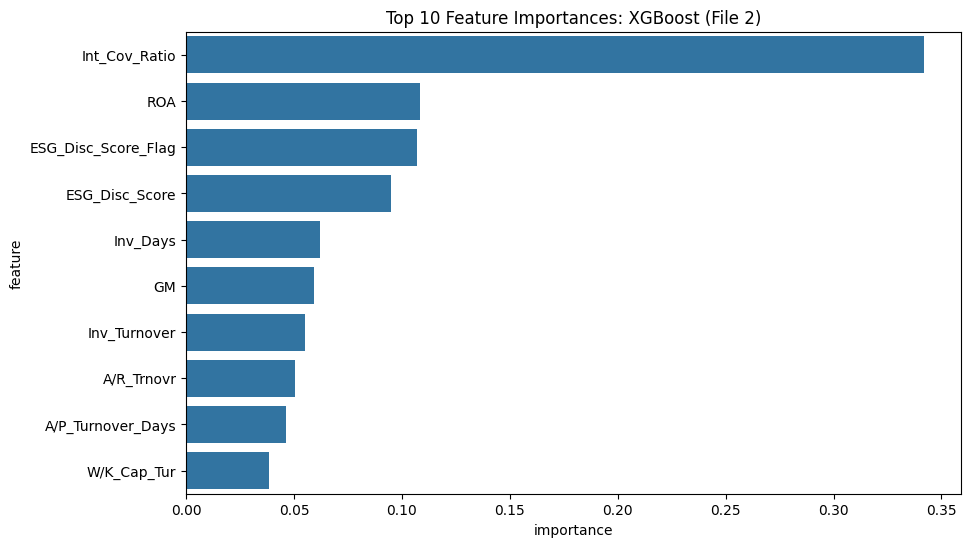


--- Evaluation Plots for LightGBM (File 2) ---


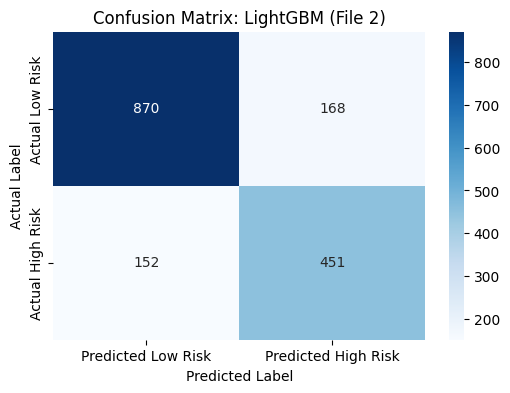

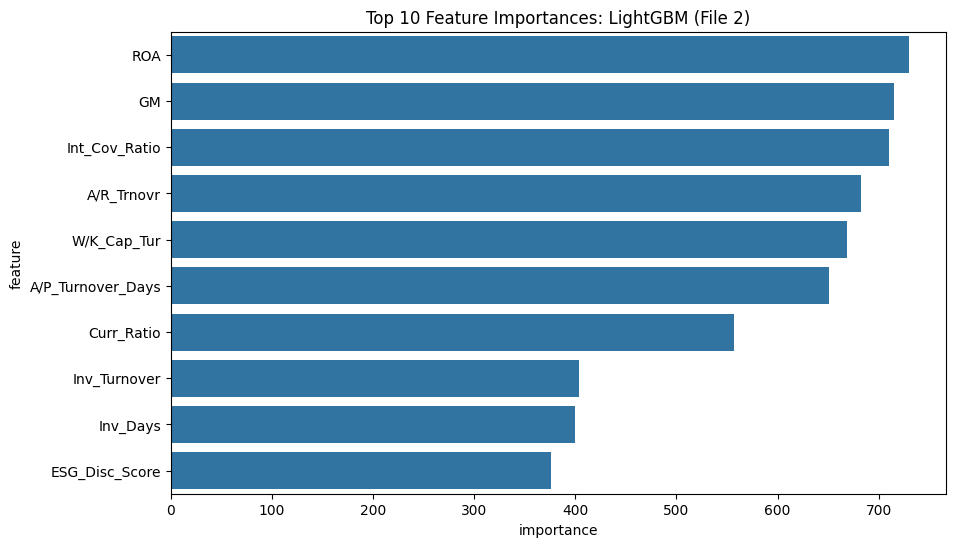


--- Evaluation Plots for AdaBoost (File 2) ---


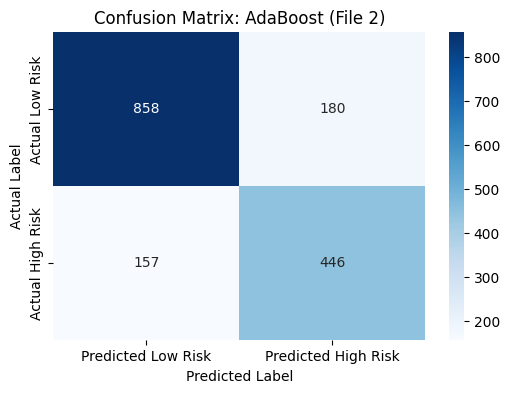

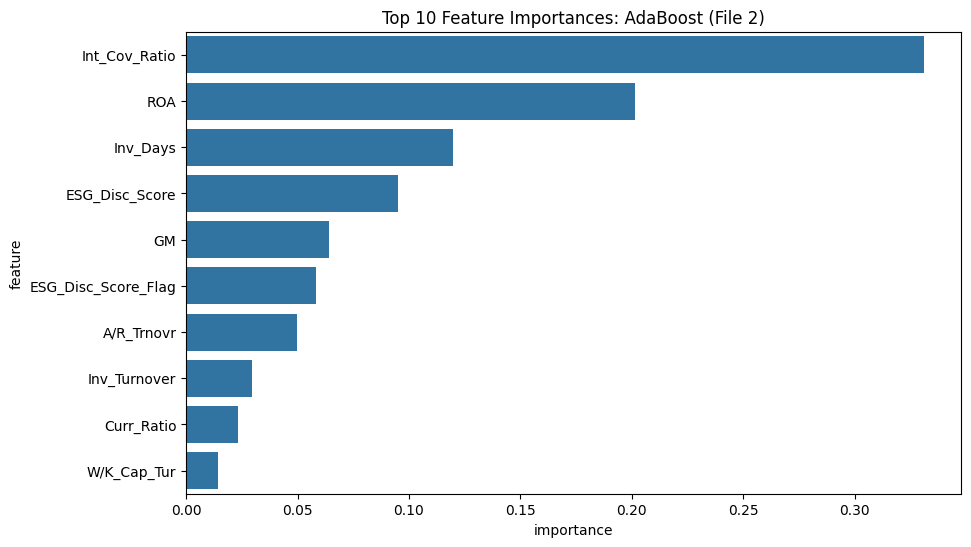

In [16]:
print("\n--- Step 3B: Final Model Training and Evaluation (Using Best Hyperparameters) ---")

def final_evaluation(X_train_smote_scaled, y_train_smote, X_test_scaled, y_test, X_test, best_params, file_name):
    """
    This function trains the final models using the best hyperparameters and
    generates all evaluation plots and summary tables.
    """
    final_models = {}
    roc_data = {}
    evaluation_results = []

    # Define the models, now using the best parameters found in the previous step
    models_to_train = {
        "Logistic Regression": LogisticRegression(random_state=42, **best_params["Logistic Regression"]),
        "Random Forest": RandomForestClassifier(random_state=42, **best_params["Random Forest"]),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **best_params["XGBoost"]),
        "LightGBM": LGBMClassifier(random_state=42, **best_params["LightGBM"]),
        "AdaBoost": AdaBoostClassifier(random_state=42, **best_params["AdaBoost"])
    }

    print(f"\nTraining final, optimized models for {file_name}...")
    for name, model in models_to_train.items():
        # Use scaled training data for all models for consistency in this final step
        model.fit(X_train_smote_scaled, y_train_smote)
        final_models[name] = model

        predictions = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

        report_dict = classification_report(y_test, predictions, output_dict=True)
        res = {'Model': name, 'AUC': roc_auc, 'Accuracy': report_dict['accuracy']}
        res.update(report_dict['weighted avg'])
        evaluation_results.append(res)

    # --- Generate Visualizations ---

    # 1. Plot Combined ROC Curves
    plt.figure(figsize=(12, 8))
    for name, data in roc_data.items():
        plt.plot(data['fpr'], data['tpr'], label=f"{name} (AUC = {data['auc']:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for All Models - {file_name}', fontsize=16)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # 2. Display Final Summary Table
    results_df = pd.DataFrame(evaluation_results)
    results_df = results_df.rename(columns={'f1-score': 'F1-Score', 'precision': 'Precision', 'recall': 'Recall', 'support': 'Support'})
    results_df = results_df[['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1-Score', 'Support']]
    print(f"\n--- Overall Model Performance Summary for {file_name} ---")
    display(results_df.style.format({'Accuracy': '{:.4f}', 'AUC': '{:.4f}', 'Precision': '{:.4f}', 'Recall': '{:.4f}', 'F1-Score': '{:.4f}'}))

    # 3. Generate Confusion Matrix and Feature Importance plots
    for name, model in final_models.items():
        print(f"\n--- Evaluation Plots for {name} ({file_name}) ---")

        cm = confusion_matrix(y_test, model.predict(X_test_scaled))
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Low Risk', 'Predicted High Risk'], yticklabels=['Actual Low Risk', 'Actual High Risk'])
        plt.title(f'Confusion Matrix: {name} ({file_name})')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_test.columns
            feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(10)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance_df)
            plt.title(f'Top 10 Feature Importances: {name} ({file_name})')
            plt.show()
        elif name == "Logistic Regression":
            coeffs = model.coef_[0]
            feature_names = X_test.columns
            coeff_df = pd.DataFrame({'feature': feature_names, 'coefficient': coeffs})
            coeff_df['abs_coefficient'] = np.abs(coeff_df['coefficient'])
            coeff_df = coeff_df.sort_values('abs_coefficient', ascending=False)
            coeff_df['color'] = ['red' if c > 0 else 'blue' for c in coeff_df['coefficient']]
            plt.figure(figsize=(10, 8))
            sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())
            plt.title(f'Feature Importance (Coefficients): {name} ({file_name})')
            plt.xlabel('Coefficient (Red=Increases Risk, Blue=Decreases Risk)')
            plt.show()

    return final_models

# Run for both files using the data prepared in Step 1 and the parameters found in Step 3A
final_models1 = final_evaluation(X1_train_smote_scaled, y1_train_smote, X1_test_scaled, y1_test, X1_test, best_params1, "File 1")
final_models2 = final_evaluation(X2_train_smote_scaled, y2_train_smote, X2_test_scaled, y2_test, X2_test, best_params2, "File 2")


## **Step 2.4: Model Explanation with SHAP**

*   Selects best-performing model (Random Forest).
*   Creates a SHAP explainer.
*   Calculates the SHAP values.
*   Visualises the results with a SHAP summary plot.


--- 4. SHAP Analysis (Explaining Model Predictions) ---
Generating SHAP plot for File 1...


 98%|===================| 1489/1520 [00:38<00:00]       

Displaying SHAP Summary Plot (Beeswarm)...


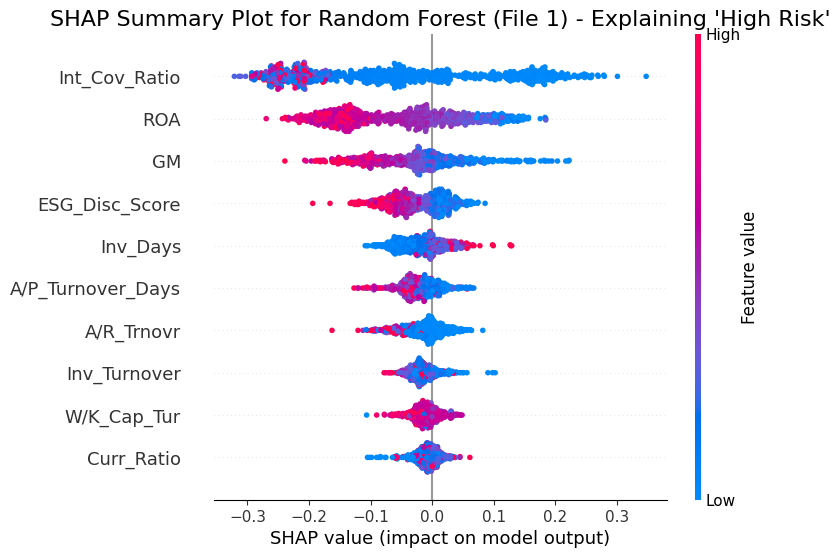

Generating SHAP plot for File 2...


100%|===================| 3272/3282 [04:18<00:00]       

Displaying SHAP Summary Plot (Beeswarm)...


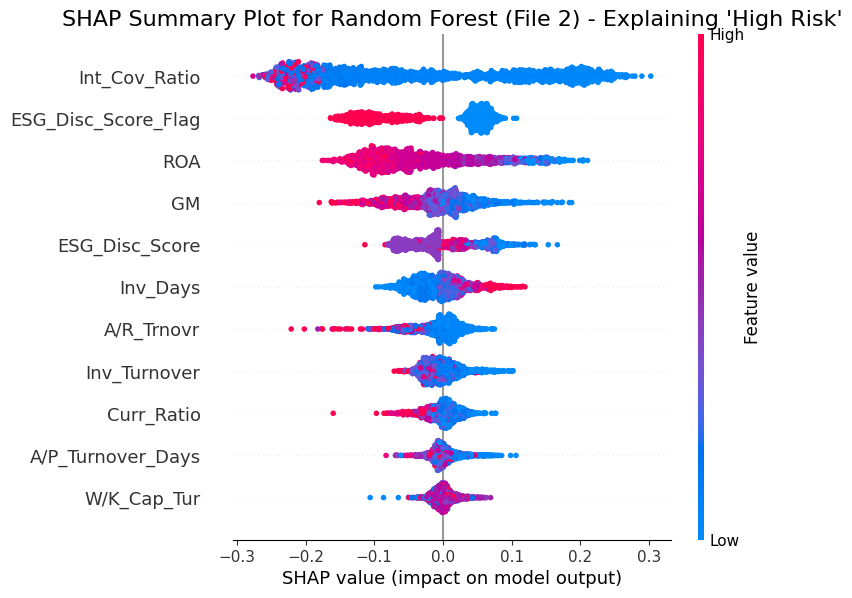

In [21]:
print("\n--- 4. SHAP Analysis (Explaining Model Predictions) ---")

def run_shap_analysis(final_models, X_train_smote_scaled, X_test_scaled, X_test, file_name):
    """
    This function performs SHAP analysis on the best-performing model
    using the scaled data for calculation and original data for plotting.
    """
    # Select the best-performing model for the explanation
    best_model_name = "Random Forest"
    best_model_shap = final_models[best_model_name]

    # Use the original, unscaled test data DataFrame for the final plot's feature values
    X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

    print(f"Generating SHAP plot for {file_name}...")

    # --- UPDATED: Use scaled data for SHAP calculation ---
    # 1. Create a SHAP explainer. For tree models, providing the training data can improve performance.
    explainer = shap.Explainer(best_model_shap, X_train_smote_scaled)

    # 2. Calculate the SHAP values on the SCALED test set.
    shap_values = explainer(X_test_scaled)

    # 3. Generate and display the SHAP summary plot
    print("Displaying SHAP Summary Plot (Beeswarm)...")

    # For binary classification, we explain the 'High Risk' class (class 1)
    # The shap_values object is multi-dimensional; [:,:,1] selects the values for the positive class.
    # We plot the SHAP values against the ORIGINAL (unscaled) X_test for interpretability.
    shap.summary_plot(shap_values[:,:,1], X_test_df, plot_type="dot", show=False)

    plt.title(f"SHAP Summary Plot for {best_model_name} ({file_name}) - Explaining 'High Risk'", fontsize=16)
    plt.show()

# --- Run the SHAP analysis for both files ---
# This code assumes all necessary variables from previous steps exist.
try:
    # Pass the scaled training and test sets to the function
    run_shap_analysis(final_models1, X1_train_smote_scaled, X1_test_scaled, X1_test, "File 1")
    run_shap_analysis(final_models2, X2_train_smote_scaled, X2_test_scaled, X2_test, "File 2")
except NameError:
    print("ERROR: Please make sure you have run all previous steps (0-3)")
    print("to generate the necessary variables before running this step.")




--- 4. SHAP Analysis (Explaining Model Predictions) ---
Generating SHAP plot for File 1...


 98%|===================| 1489/1520 [00:38<00:00]       

Displaying SHAP Summary Plot (Beeswarm)...


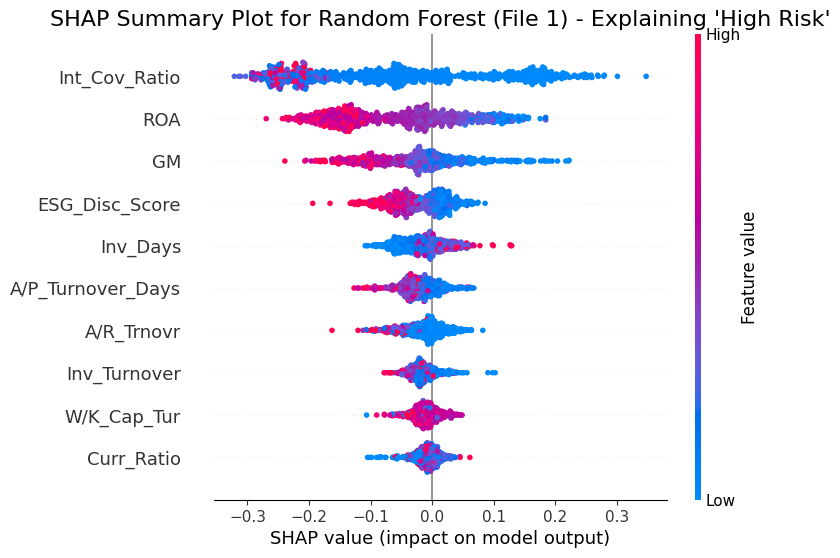

Generating SHAP plot for File 2...


100%|===================| 3274/3282 [04:17<00:00]       

Displaying SHAP Summary Plot (Beeswarm)...


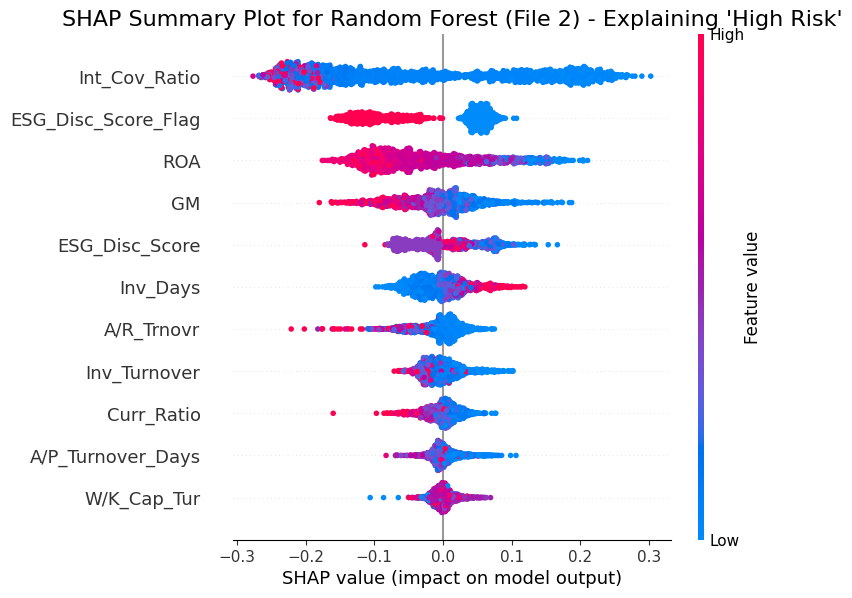

In [22]:
print("\n--- 4. SHAP Analysis (Explaining Model Predictions) ---")

def run_shap_analysis(final_models, X_train_smote_scaled, X_test_scaled, X_test, file_name):
    """
    This function performs SHAP analysis on the best-performing model
    using the scaled data for calculation and original data for plotting.
    """
    # Select the best-performing model for the explanation
    best_model_name = "Random Forest"
    best_model_shap = final_models[best_model_name]

    # Use the original, unscaled test data DataFrame for the final plot's feature values
    X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

    print(f"Generating SHAP plot for {file_name}...")

    # --- CORRECTED CODE ---
    # 1. Create a SHAP explainer. For tree models, providing the training data
    #    (which the model was trained on) can help the explainer.
    explainer = shap.Explainer(best_model_shap, X_train_smote_scaled)

    # 2. Calculate the SHAP values on the SCALED test set.
    #    This is the correct approach as the model was trained on scaled data.
    shap_values = explainer(X_test_scaled)

    # 3. Generate and display the SHAP summary plot
    print("Displaying SHAP Summary Plot (Beeswarm)...")

    # We plot the calculated SHAP values against the ORIGINAL (unscaled) X_test
    # data for better, human-readable interpretation.
    shap.summary_plot(shap_values[:,:,1], X_test_df, plot_type="dot", show=False)

    plt.title(f"SHAP Summary Plot for {best_model_name} ({file_name}) - Explaining 'High Risk'", fontsize=16)
    plt.show()

# --- Run the SHAP analysis for both files ---
# This code assumes all necessary variables from previous steps exist.
try:
    # Pass the scaled training and test sets to the function
    run_shap_analysis(final_models1, X1_train_smote_scaled, X1_test_scaled, X1_test, "File 1")
    run_shap_analysis(final_models2, X2_train_smote_scaled, X2_test_scaled, X2_test, "File 2")
except NameError:
    print("ERROR: Please make sure you have run all previous steps (0-3)")
    print("to generate the necessary variables before running this step.")



## **Step 2.5: Partial Dependence and Binning Plots**


--- Step 5: Partial Dependence and Binning Plots ---
Generating PDPs for File 1...


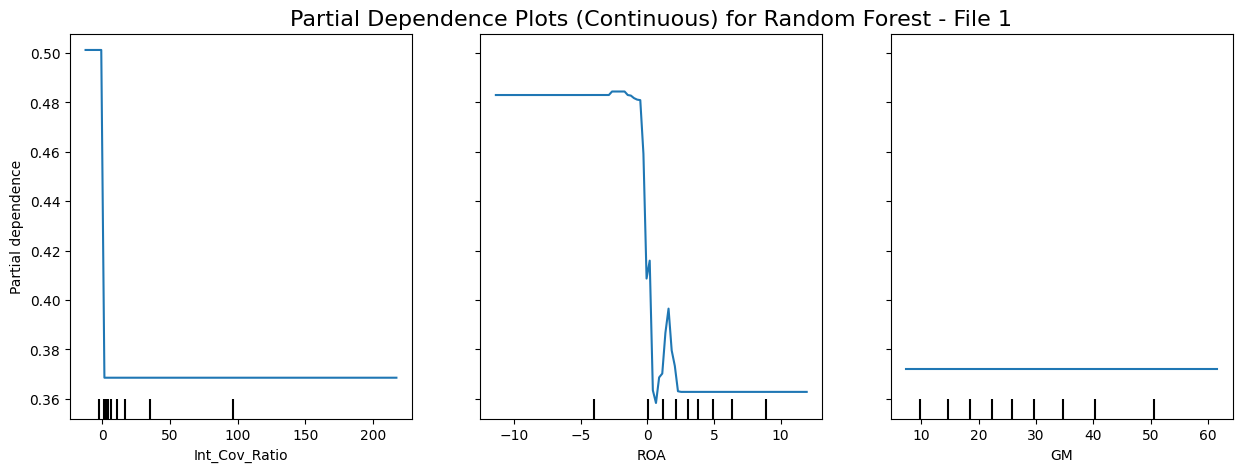


Generating Binning Plot for File 1...


/tmp/ipython-input-27-575466826.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bin_Range', y='Risk_Category', data=binned_risk, palette='vlag')


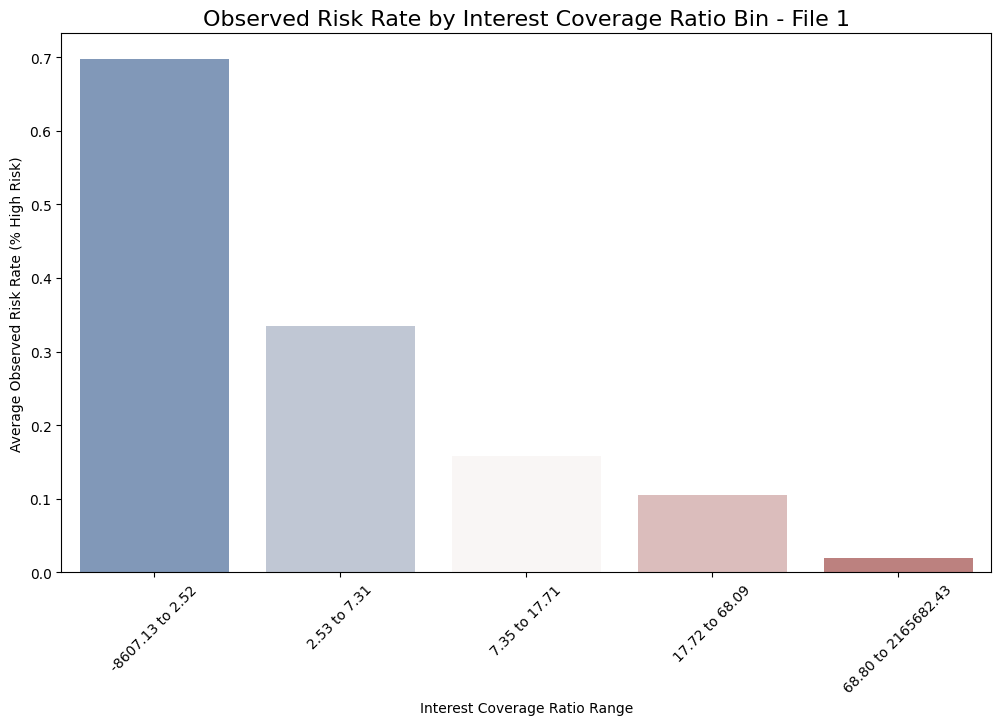

Generating PDPs for File 2...


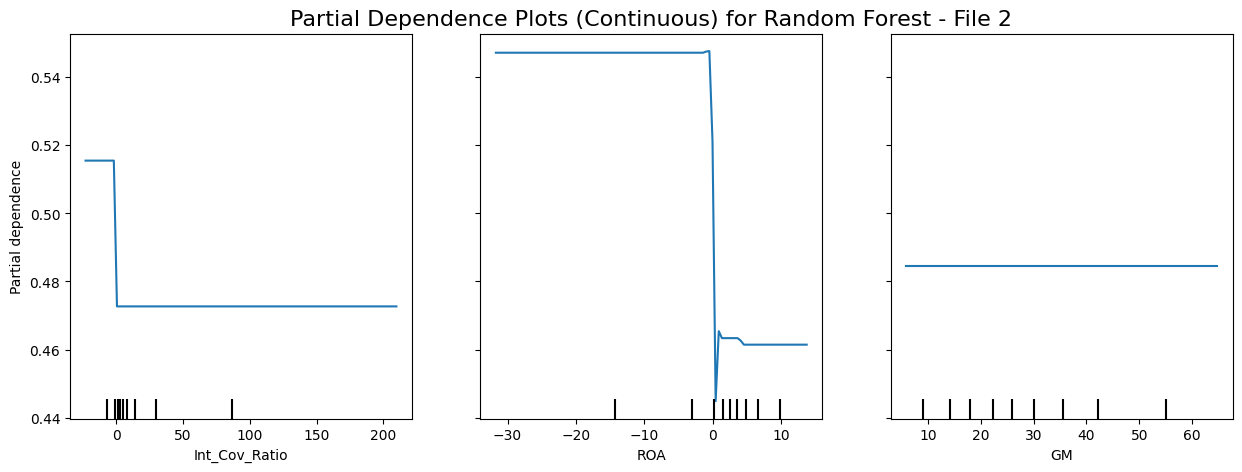

Displaying PDP for binary feature (ESG_Disc_Score_Flag)...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-27-575466826.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature Value', y='Partial Dependence', data=pdp_df, palette='viridis')


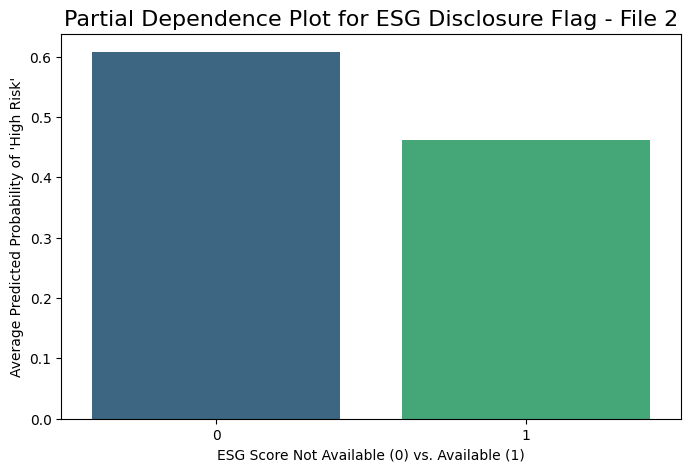

/tmp/ipython-input-27-575466826.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bin_Range', y='Risk_Category', data=binned_risk, palette='vlag')



Generating Binning Plot for File 2...


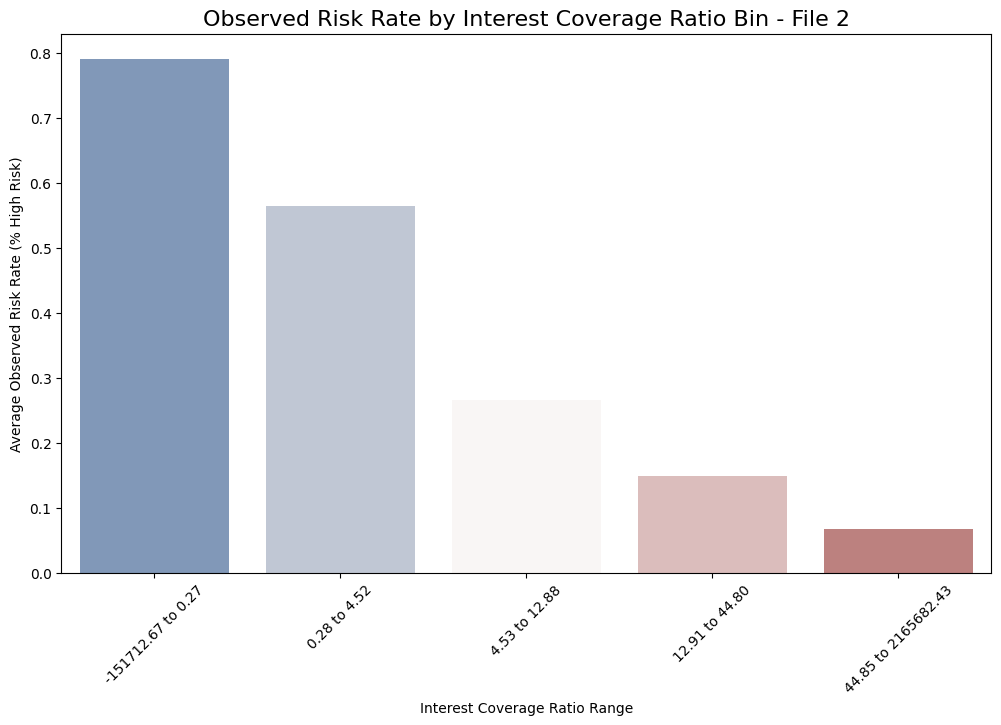

In [27]:
print("\n--- Step 5: Partial Dependence and Binning Plots ---")

def create_pdp_binning_plots(final_models, X_train_smote, X_test, y_test, scaler, file_name):
    """
    This function generates PDPs and Binning Plots to interpret the best model.
    """
    # Select the best-performing model for these visualizations
    best_model_name = "Random Forest"
    best_model = final_models[best_model_name]

    # --- Partial Dependence Plots (PDPs) ---
    print(f"Generating PDPs for {file_name}...")

    # Convert the training data back to a DataFrame to ensure column names are available
    X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_test.columns)

    # Plot the top continuous features
    continuous_features = ['Int_Cov_Ratio', 'ROA', 'GM']
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title(f"Partial Dependence Plots (Continuous) for {best_model_name} - {file_name}", fontsize=16)
    PartialDependenceDisplay.from_estimator(best_model, X_train_smote_df, continuous_features, ax=ax)
    plt.show()

    # If File 2 is being processed, also plot the binary flag feature separately
    if 'ESG_Disc_Score_Flag' in X_test.columns:
        print("Displaying PDP for binary feature (ESG_Disc_Score_Flag)...")

        # Manually calculate partial dependence for the binary feature to avoid errors
        X_train_0 = X_train_smote_df.copy()
        X_train_1 = X_train_smote_df.copy()
        X_train_0['ESG_Disc_Score_Flag'] = 0
        X_train_1['ESG_Disc_Score_Flag'] = 1

        # Scale these modified datasets before prediction
        X_train_0_scaled = scaler.transform(X_train_0)
        X_train_1_scaled = scaler.transform(X_train_1)

        # Get the average predicted probability of 'High Risk' (class 1)
        avg_pred_0 = best_model.predict_proba(X_train_0_scaled)[:, 1].mean()
        avg_pred_1 = best_model.predict_proba(X_train_1_scaled)[:, 1].mean()

        pdp_df = pd.DataFrame({
            'Feature Value': [0, 1],
            'Partial Dependence': [avg_pred_0, avg_pred_1]
        })

        plt.figure(figsize=(8, 5))
        sns.barplot(x='Feature Value', y='Partial Dependence', data=pdp_df, palette='viridis')
        plt.title(f"Partial Dependence Plot for ESG Disclosure Flag - {file_name}", fontsize=16)
        plt.xlabel("ESG Score Not Available (0) vs. Available (1)")
        plt.ylabel("Average Predicted Probability of 'High Risk'")
        plt.show()


    # --- Binning Plots ---
    print(f"\nGenerating Binning Plot for {file_name}...")
    binning_df = X_test.copy()
    binning_df['Risk_Category'] = y_test

    # Create 5 bins (quintiles) for the most important feature
    binning_df['Int_Cov_Ratio_Bin'] = pd.qcut(binning_df['Int_Cov_Ratio'], q=5, labels=False, duplicates='drop')

    # Calculate the average actual risk for each bin
    binned_risk = binning_df.groupby('Int_Cov_Ratio_Bin')['Risk_Category'].mean().reset_index()

    # Get the value range for each bin to use as clear labels
    bin_labels = binning_df.groupby('Int_Cov_Ratio_Bin')['Int_Cov_Ratio'].agg(['min', 'max'])
    binned_risk['Bin_Range'] = bin_labels.apply(lambda row: f"{row['min']:.2f} to {row['max']:.2f}", axis=1)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Bin_Range', y='Risk_Category', data=binned_risk, palette='vlag')
    plt.title(f'Observed Risk Rate by Interest Coverage Ratio Bin - {file_name}', fontsize=16)
    plt.xlabel('Interest Coverage Ratio Range')
    plt.ylabel('Average Observed Risk Rate (% High Risk)')
    plt.xticks(rotation=45)
    plt.show()

# --- Run for both files using the results from the previous steps ---
# This assumes 'final_models1', 'X1_train_smote', etc. have been created
try:
    create_pdp_binning_plots(final_models1, X1_train_smote, X1_test, y1_test, scaler1, "File 1")
    create_pdp_binning_plots(final_models2, X2_train_smote, X2_test, y2_test, scaler2, "File 2")
except NameError:
    print("ERROR: Please make sure you have run all previous steps (0-3B)")
    print("to generate the necessary variables before running this step.")

